#Analysis for open ended questions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


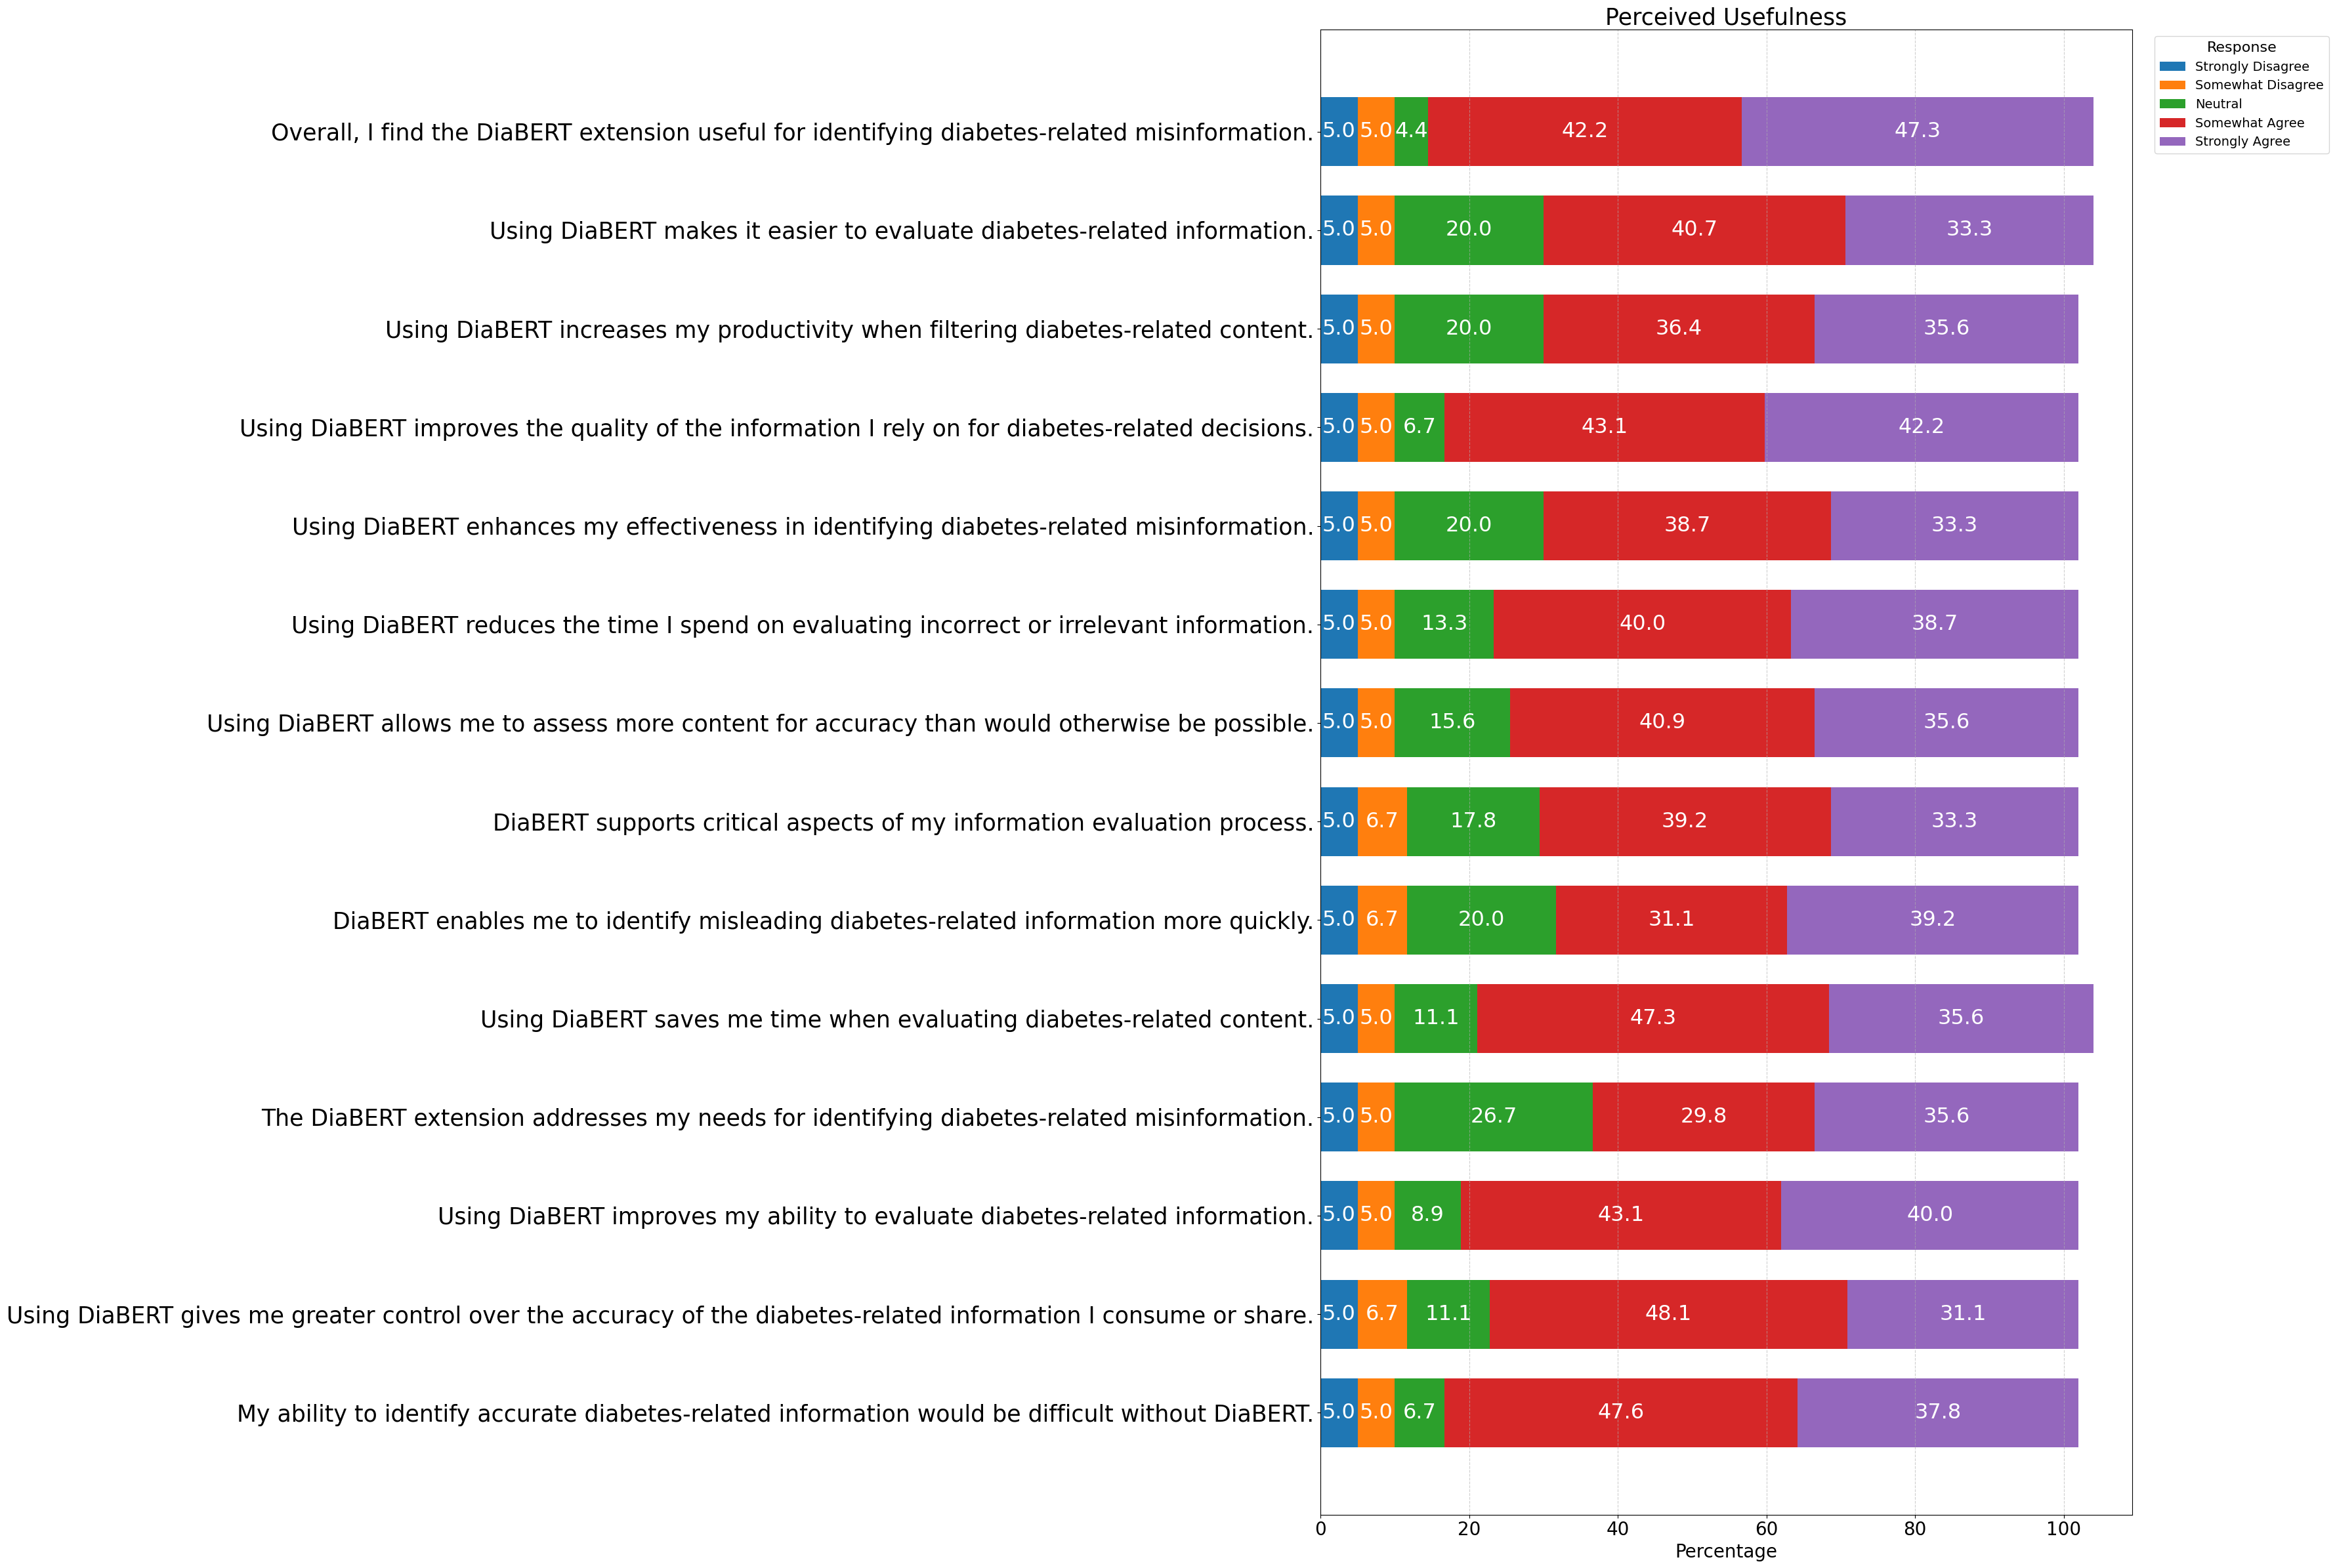

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/DiaBERT response.csv")
df_trimmed = df.drop(index=[0, 1])  # drop headers

# Define question mapping for Section 1 (Perceived Usefulness)
question_texts = {
    'QID43_1': 'My ability to identify accurate diabetes-related information would be difficult without DiaBERT.',
    'QID43_2': 'Using DiaBERT gives me greater control over the accuracy of the diabetes-related information I consume or share.',
    'QID43_3': 'Using DiaBERT improves my ability to evaluate diabetes-related information.',
    'QID43_4': 'The DiaBERT extension addresses my needs for identifying diabetes-related misinformation.',
    'QID43_5': 'Using DiaBERT saves me time when evaluating diabetes-related content.',
    'QID43_6': 'DiaBERT enables me to identify misleading diabetes-related information more quickly.',
    'QID43_7': 'DiaBERT supports critical aspects of my information evaluation process.',
    'QID43_8': 'Using DiaBERT allows me to assess more content for accuracy than would otherwise be possible.',
    'QID43_9': 'Using DiaBERT reduces the time I spend on evaluating incorrect or irrelevant information.',
    'QID43_10': 'Using DiaBERT enhances my effectiveness in identifying diabetes-related misinformation.',
    'QID43_11': 'Using DiaBERT improves the quality of the information I rely on for diabetes-related decisions.',
    'QID43_12': 'Using DiaBERT increases my productivity when filtering diabetes-related content.',
    'QID43_13': 'Using DiaBERT makes it easier to evaluate diabetes-related information.',
    'QID43_14': 'Overall, I find the DiaBERT extension useful for identifying diabetes-related misinformation.'
}

# Likert mapping
likert_labels = {
    1: 'Strongly Disagree',
    2: 'Somewhat Disagree',
    3: 'Neutral',
    4: 'Somewhat Agree',
    5: 'Strongly Agree'
}
likert_order = list(likert_labels.values())

# Prepare data
df_trimmed[list(question_texts.keys())] = df_trimmed[list(question_texts.keys())].apply(pd.to_numeric, errors='coerce')

# Create frequency tables with placeholder values for 0%
min_visible_pct = 2.0
freq_tables = {}

for col in question_texts:
    cleaned = df_trimmed[col][df_trimmed[col].isin(likert_labels.keys())]
    freq = cleaned.map(likert_labels).value_counts(normalize=True).reindex(likert_order, fill_value=0) * 100
    display_freq = freq.apply(lambda x: max(x, min_visible_pct) if x == 0 else x)
    freq_tables[question_texts[col]] = display_freq


# Build DataFrame
#chart_df = pd.DataFrame(freq_tables).T[likert_order]

chart_df = pd.DataFrame(freq_tables).T[likert_order]

# Force blue and orange bars to be visually longer
#for cat in ['Strongly Disagree', 'Somewhat Disagree']:
    #chart_df[cat] = chart_df[cat].apply(lambda x: max(x, 5.0) if x > 0 else 0.0)

for idx, row in chart_df.iterrows():
    inflation_total = 0
    for cat in ['Strongly Disagree', 'Somewhat Disagree']:
        val = row[cat]
        if 0 < val < 5.0:
            inflation = 5.0 - val
            chart_df.at[idx, cat] = 5.0
            inflation_total += inflation

    # Subtract inflation from the largest *non-inflated* category
    if inflation_total > 0:
        candidates = [c for c in likert_order if c not in ['Strongly Disagree', 'Somewhat Disagree']]
        largest_cat = row[candidates].idxmax()
        chart_df.at[idx, largest_cat] -= inflation_total

# Plotting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
fig, ax = plt.subplots(figsize=(36, 24))
left = [0] * len(chart_df)



for i, category in enumerate(likert_order):
    vals = chart_df[category]
    bars = ax.barh(chart_df.index, vals, left=left, label=category, height=0.7, color=colors[i])
    for j, (value, lft) in enumerate(zip(vals, left)):
        #text_val = f'{value:.1f}%' if value > 0 else '0.0%'
        text_val = f'{value:.1f}' if value > 0 else '0.0'

        ax.text(lft + value / 2, j, text_val, va='center', ha='center', fontsize=23, color='white')
    left = [x + y for x, y in zip(left, vals)]




# Axis formatting
ax.set_yticks(range(len(chart_df)))
ax.set_yticklabels(chart_df.index, fontsize=25)
ax.set_xlabel('Percentage', fontsize=20)
ax.set_title('Perceived Usefulness', fontsize=25)
ax.tick_params(axis='x', labelsize=20)

ax.legend(title='Response', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=14, title_fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/section 1.png", dpi=600, bbox_inches="tight")



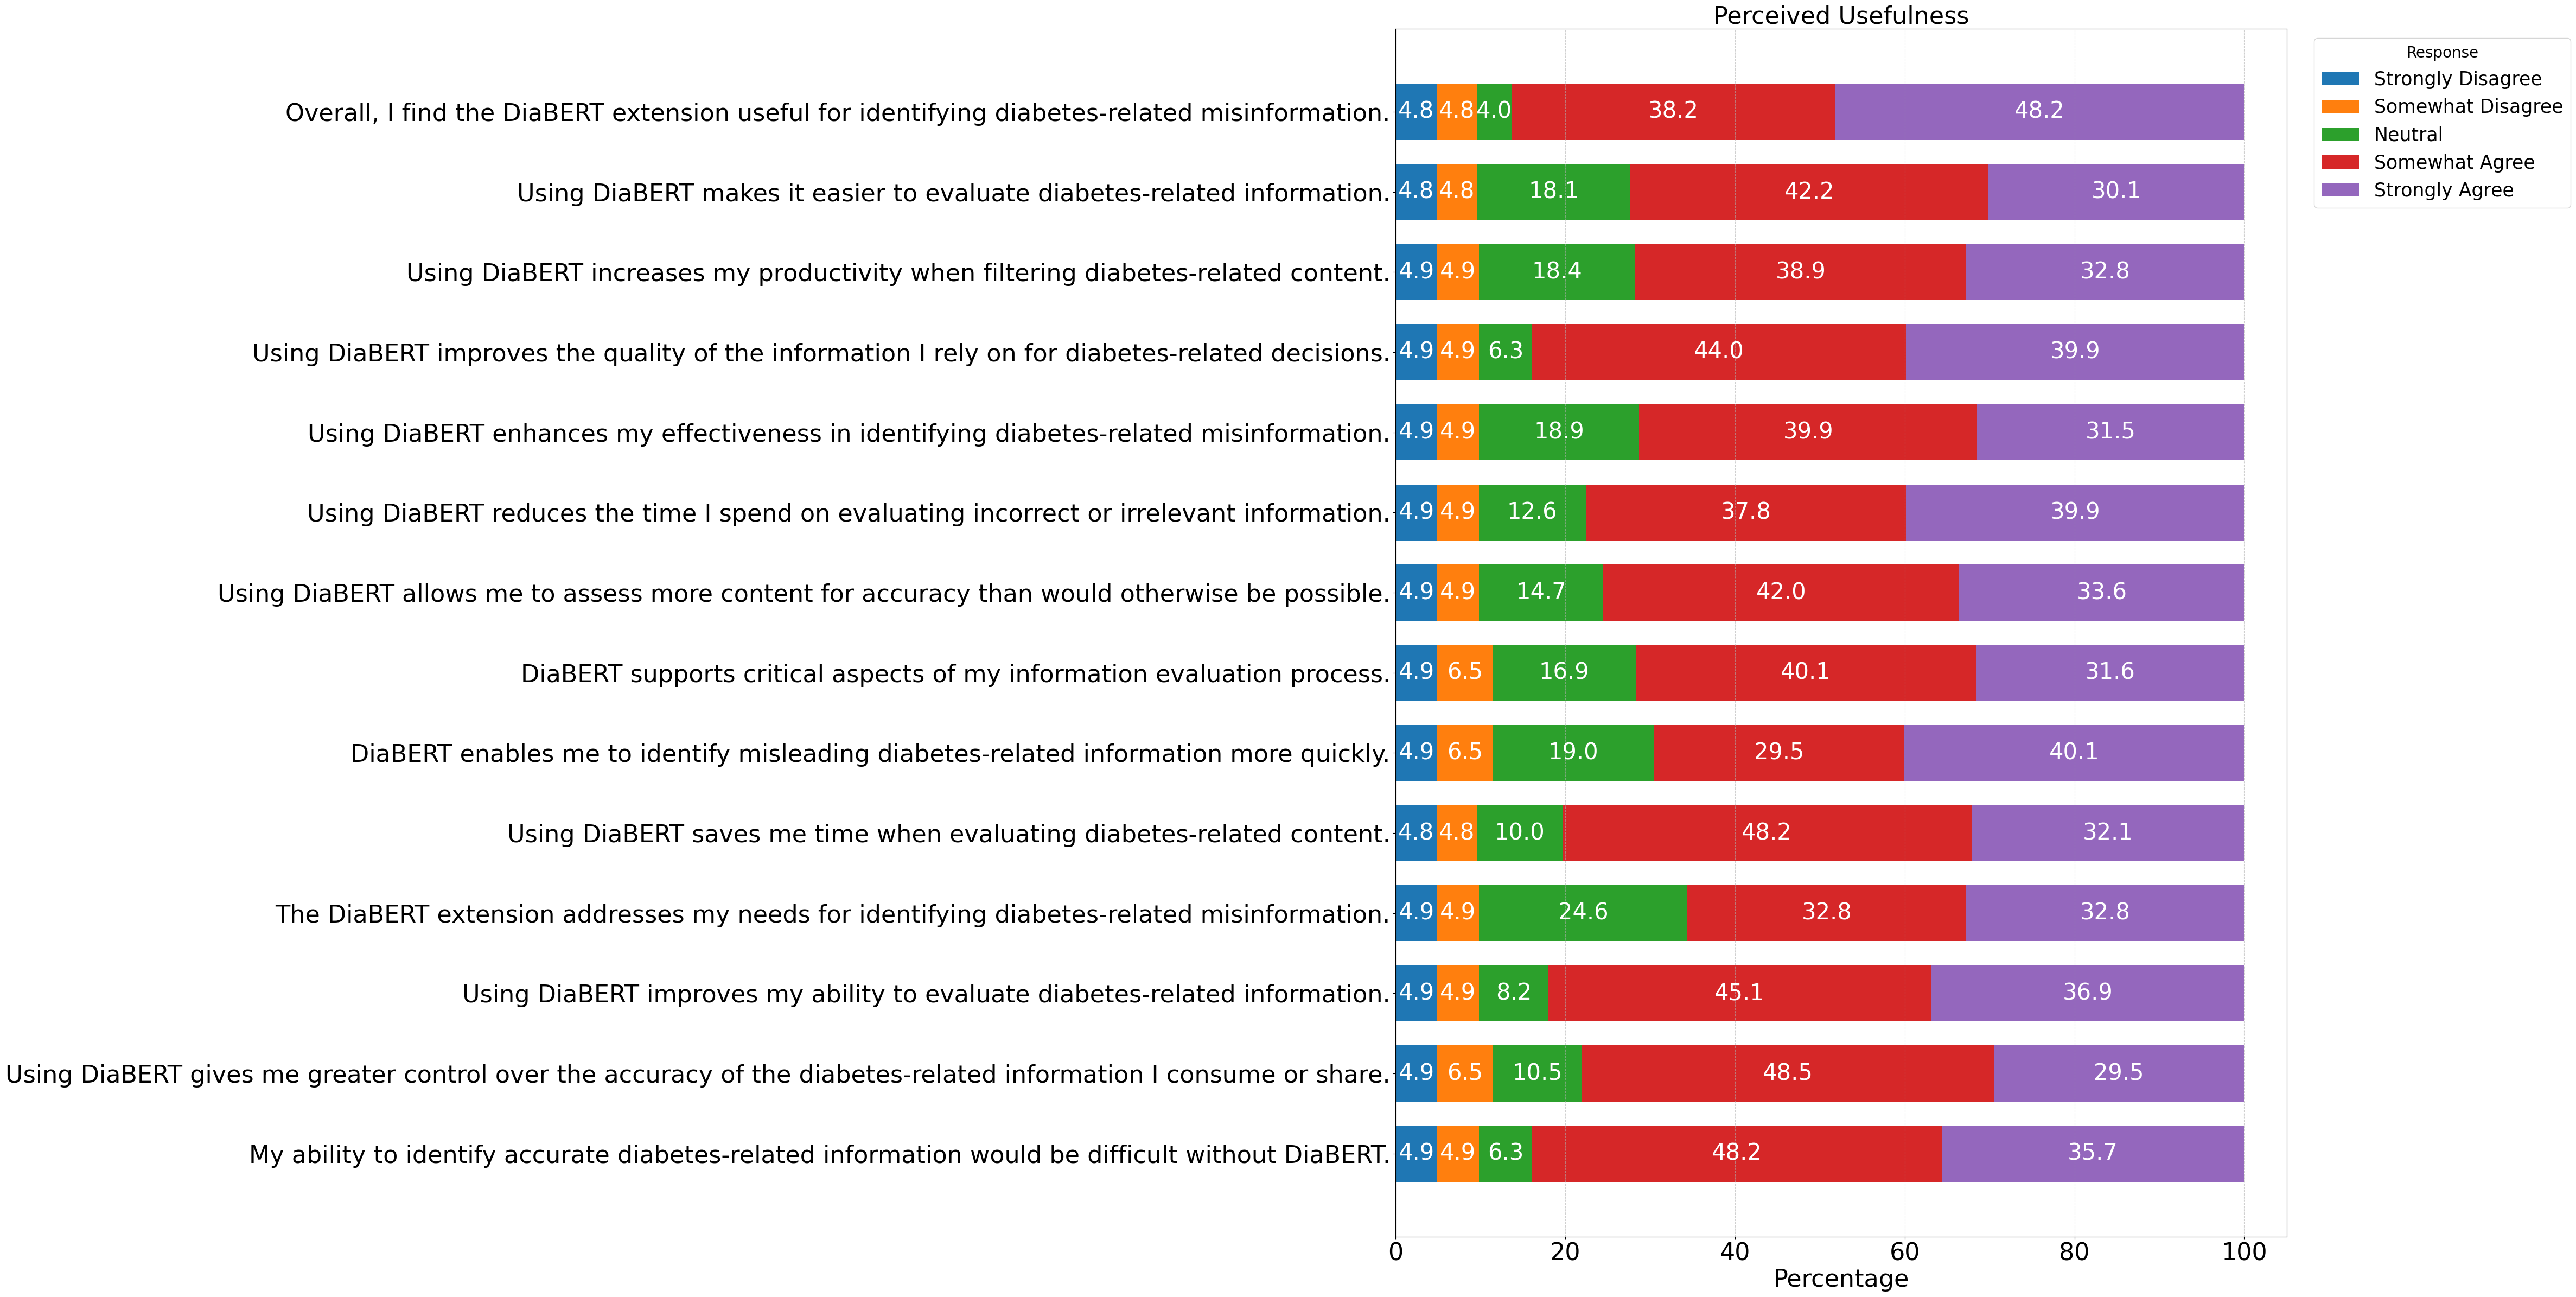

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/DiaBERT response.csv")
df_trimmed = df.drop(index=[0, 1])  # drop headers

# Define question mapping for Section 1 (Perceived Usefulness)
question_texts = {
    'QID43_1': 'My ability to identify accurate diabetes-related information would be difficult without DiaBERT.',
    'QID43_2': 'Using DiaBERT gives me greater control over the accuracy of the diabetes-related information I consume or share.',
    'QID43_3': 'Using DiaBERT improves my ability to evaluate diabetes-related information.',
    'QID43_4': 'The DiaBERT extension addresses my needs for identifying diabetes-related misinformation.',
    'QID43_5': 'Using DiaBERT saves me time when evaluating diabetes-related content.',
    'QID43_6': 'DiaBERT enables me to identify misleading diabetes-related information more quickly.',
    'QID43_7': 'DiaBERT supports critical aspects of my information evaluation process.',
    'QID43_8': 'Using DiaBERT allows me to assess more content for accuracy than would otherwise be possible.',
    'QID43_9': 'Using DiaBERT reduces the time I spend on evaluating incorrect or irrelevant information.',
    'QID43_10': 'Using DiaBERT enhances my effectiveness in identifying diabetes-related misinformation.',
    'QID43_11': 'Using DiaBERT improves the quality of the information I rely on for diabetes-related decisions.',
    'QID43_12': 'Using DiaBERT increases my productivity when filtering diabetes-related content.',
    'QID43_13': 'Using DiaBERT makes it easier to evaluate diabetes-related information.',
    'QID43_14': 'Overall, I find the DiaBERT extension useful for identifying diabetes-related misinformation.'
}

# Likert mapping
likert_labels = {
    1: 'Strongly Disagree',
    2: 'Somewhat Disagree',
    3: 'Neutral',
    4: 'Somewhat Agree',
    5: 'Strongly Agree'
}
likert_order = list(likert_labels.values())

# Prepare data
df_trimmed[list(question_texts.keys())] = df_trimmed[list(question_texts.keys())].apply(pd.to_numeric, errors='coerce')

# Create frequency tables with placeholder values for 0%
min_visible_pct = 2.0
freq_tables = {}

for col in question_texts:
    cleaned = df_trimmed[col][df_trimmed[col].isin(likert_labels.keys())]
    freq = cleaned.map(likert_labels).value_counts(normalize=True).reindex(likert_order, fill_value=0) * 100
    display_freq = freq.apply(lambda x: max(x, min_visible_pct) if x == 0 else x)
    freq_tables[question_texts[col]] = display_freq


# Build DataFrame
#chart_df = pd.DataFrame(freq_tables).T[likert_order]

chart_df = pd.DataFrame(freq_tables).T[likert_order]

# Force blue and orange bars to be visually longer
#for cat in ['Strongly Disagree', 'Somewhat Disagree']:
    #chart_df[cat] = chart_df[cat].apply(lambda x: max(x, 5.0) if x > 0 else 0.0)

for idx, row in chart_df.iterrows():
    inflation_total = 0
    for cat in ['Strongly Disagree', 'Somewhat Disagree']:
        val = row[cat]
        if 0 < val < 5.0:
            inflation = 5.0 - val
            chart_df.at[idx, cat] = 5.0
            inflation_total += inflation

    if inflation_total > 0:
        # Distribute inflation proportionally across other categories
        candidates = [c for c in likert_order if c not in ['Strongly Disagree', 'Somewhat Disagree']]
        total_candidate_val = row[candidates].sum()
        for cat in candidates:
            if total_candidate_val > 0:
                adjustment = (row[cat] / total_candidate_val) * inflation_total
                chart_df.at[idx, cat] -= adjustment

    # Final safeguard: normalize row to sum exactly 100%
    row_sum = chart_df.loc[idx].sum()
    if abs(row_sum - 100.0) > 0.01:
        chart_df.loc[idx] = chart_df.loc[idx] * (100.0 / row_sum)


# Plotting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
fig, ax = plt.subplots(figsize=(48, 24))
left = [0] * len(chart_df)



for i, category in enumerate(likert_order):
    vals = chart_df[category]
    bars = ax.barh(chart_df.index, vals, left=left, label=category, height=0.7, color=colors[i])
    for j, (value, lft) in enumerate(zip(vals, left)):
        #text_val = f'{value:.1f}%' if value > 0 else '0.0%'
        text_val = f'{value:.1f}' if value > 0 else '0.0'

        ax.text(lft + value / 2, j, text_val, va='center', ha='center', fontsize=30, color='white')
    left = [x + y for x, y in zip(left, vals)]




# Axis formatting
ax.set_yticks(range(len(chart_df)))
#ax.set_yticklabels(chart_df.index, fontsize=27)
ax.set_yticklabels(chart_df.index, fontsize=32)

#ax.set_xlabel('Percentage', fontsize=24)
ax.set_xlabel('Percentage', fontsize=32)

#ax.set_title('Perceived Usefulness', fontsize=27)
ax.set_title('Perceived Usefulness', fontsize=32)

ax.tick_params(axis='x', labelsize=32)


ax.legend(title='Response', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=25, title_fontsize=20)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/section 1.png", dpi=600, bbox_inches="tight")



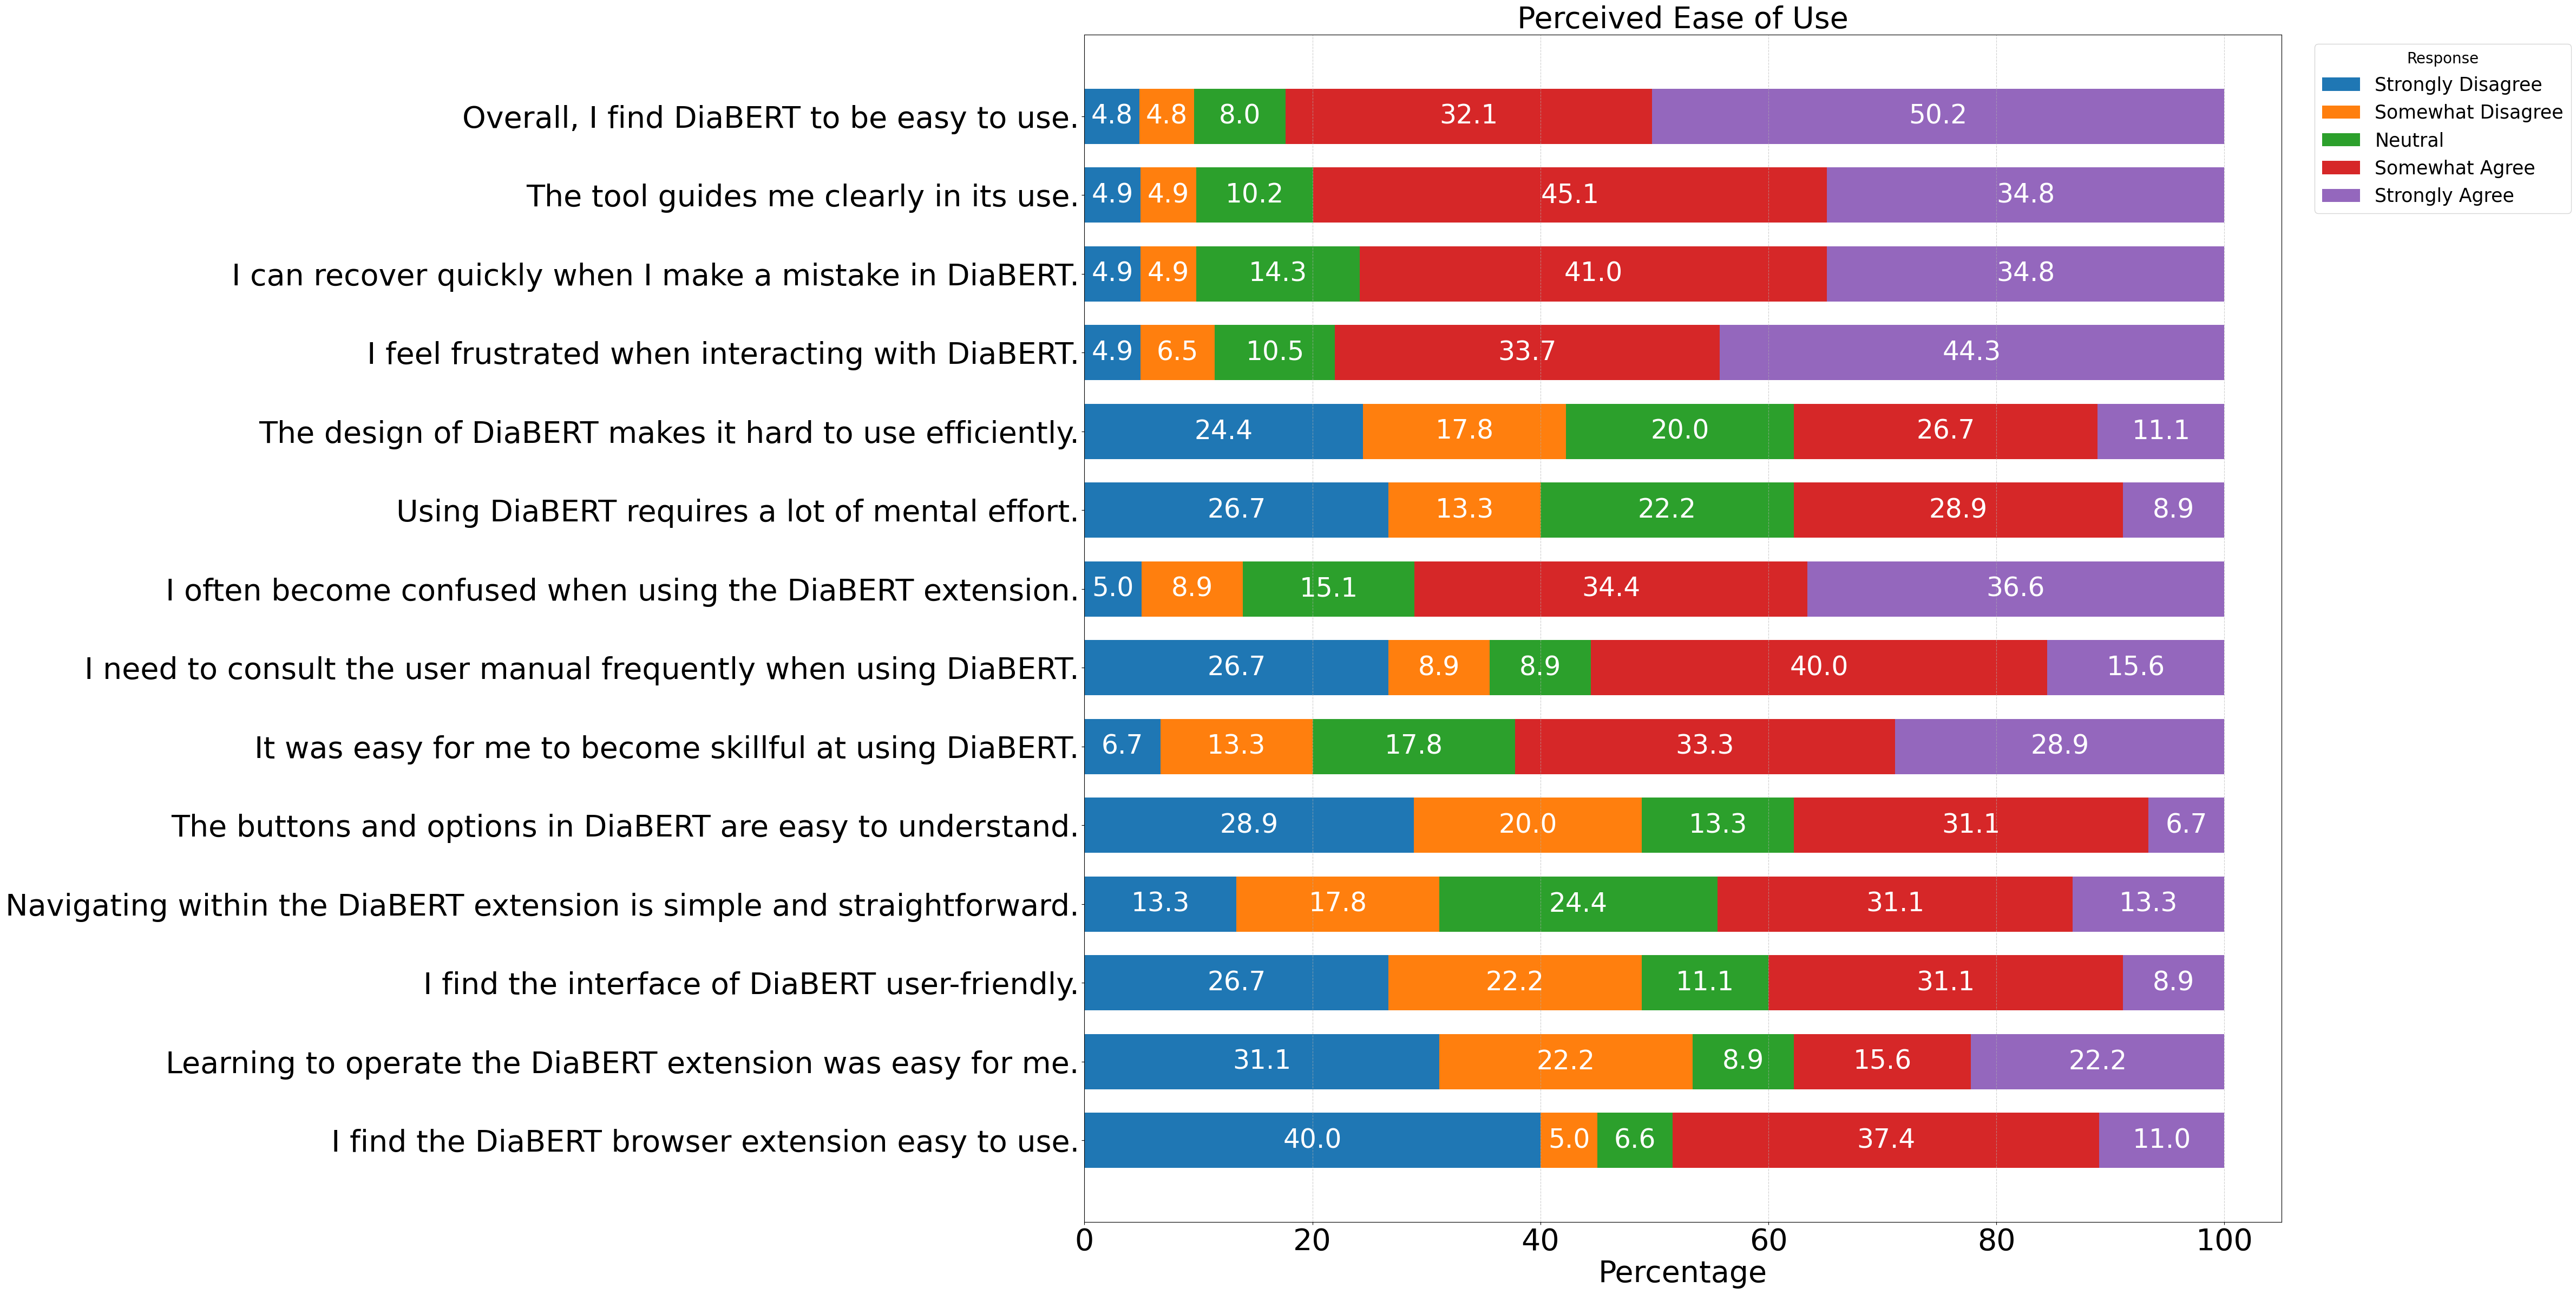

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/DiaBERT response.csv")
df_trimmed = df.drop(index=[0, 1])  # drop headers

# Define question mapping for Section 2 (Perceived Ease of Use)
question_texts = {
    'QID44_1': "I find the DiaBERT browser extension easy to use.",
    'QID44_2': "Learning to operate the DiaBERT extension was easy for me.",
    'QID44_3': "I find the interface of DiaBERT user-friendly.",
    'QID44_4': "Navigating within the DiaBERT extension is simple and straightforward.",
    'QID44_5': "The buttons and options in DiaBERT are easy to understand.",
    'QID44_6': "It was easy for me to become skillful at using DiaBERT.",
    'QID44_7': "I need to consult the user manual frequently when using DiaBERT.",
    'QID44_8': "I often become confused when using the DiaBERT extension.",
    'QID44_9': "Using DiaBERT requires a lot of mental effort.",
    'QID44_10': "The design of DiaBERT makes it hard to use efficiently.",
    'QID44_11': "I feel frustrated when interacting with DiaBERT.",
    'QID44_12': "I can recover quickly when I make a mistake in DiaBERT.",
    'QID44_13': "The tool guides me clearly in its use.",
    'QID44_14': "Overall, I find DiaBERT to be easy to use."
}

# Likert scale mapping
likert_labels = {
    1: 'Strongly Disagree',
    2: 'Somewhat Disagree',
    3: 'Neutral',
    4: 'Somewhat Agree',
    5: 'Strongly Agree'
}
likert_order = list(likert_labels.values())

# Prepare data
df_trimmed[list(question_texts.keys())] = df_trimmed[list(question_texts.keys())].apply(pd.to_numeric, errors='coerce')

# Create frequency tables
freq_tables = {}
for col in question_texts:
    cleaned = df_trimmed[col][df_trimmed[col].isin(likert_labels.keys())]
    freq = cleaned.map(likert_labels).value_counts(normalize=True).reindex(likert_order, fill_value=0) * 100
    display_freq = freq.apply(lambda x: max(x, 2.0) if x == 0 else x)  # Avoid invisible bars
    freq_tables[question_texts[col]] = display_freq

# Build chart DataFrame
chart_df = pd.DataFrame(freq_tables).T[likert_order]

# Adjust visual consistency for blue/orange bars and normalize
for idx, row in chart_df.iterrows():
    inflation_total = 0
    for cat in ['Strongly Disagree', 'Somewhat Disagree']:
        val = row[cat]
        if 0 < val < 5.0:
            inflation = 5.0 - val
            chart_df.at[idx, cat] = 5.0
            inflation_total += inflation

    if inflation_total > 0:
        candidates = [c for c in likert_order if c not in ['Strongly Disagree', 'Somewhat Disagree']]
        total_candidate_val = row[candidates].sum()
        for cat in candidates:
            if total_candidate_val > 0:
                adjustment = (row[cat] / total_candidate_val) * inflation_total
                chart_df.at[idx, cat] -= adjustment

    # Normalize to ensure sum is 100%
    row_sum = chart_df.loc[idx].sum()
    if abs(row_sum - 100.0) > 0.01:
        chart_df.loc[idx] = chart_df.loc[idx] * (100.0 / row_sum)

# Plotting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
fig, ax = plt.subplots(figsize=(48, 24))
left = [0] * len(chart_df)

for i, category in enumerate(likert_order):
    vals = chart_df[category]
    bars = ax.barh(chart_df.index, vals, left=left, label=category, height=0.7, color=colors[i])
    for j, (value, lft) in enumerate(zip(vals, left)):
        text_val = f'{value:.1f}' if value > 0 else '0.0'
        ax.text(lft + value / 2, j, text_val, va='center', ha='center', fontsize=35, color='white')
    left = [x + y for x, y in zip(left, vals)]

# Axis formatting
ax.set_yticks(range(len(chart_df)))
ax.set_yticklabels(chart_df.index, fontsize=40)
ax.set_xlabel('Percentage', fontsize=40)
ax.set_title('Perceived Ease of Use', fontsize=40)
ax.tick_params(axis='x', labelsize=40)

ax.legend(title='Response', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=25, title_fontsize=20)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/section 2.png", dpi=600, bbox_inches="tight")


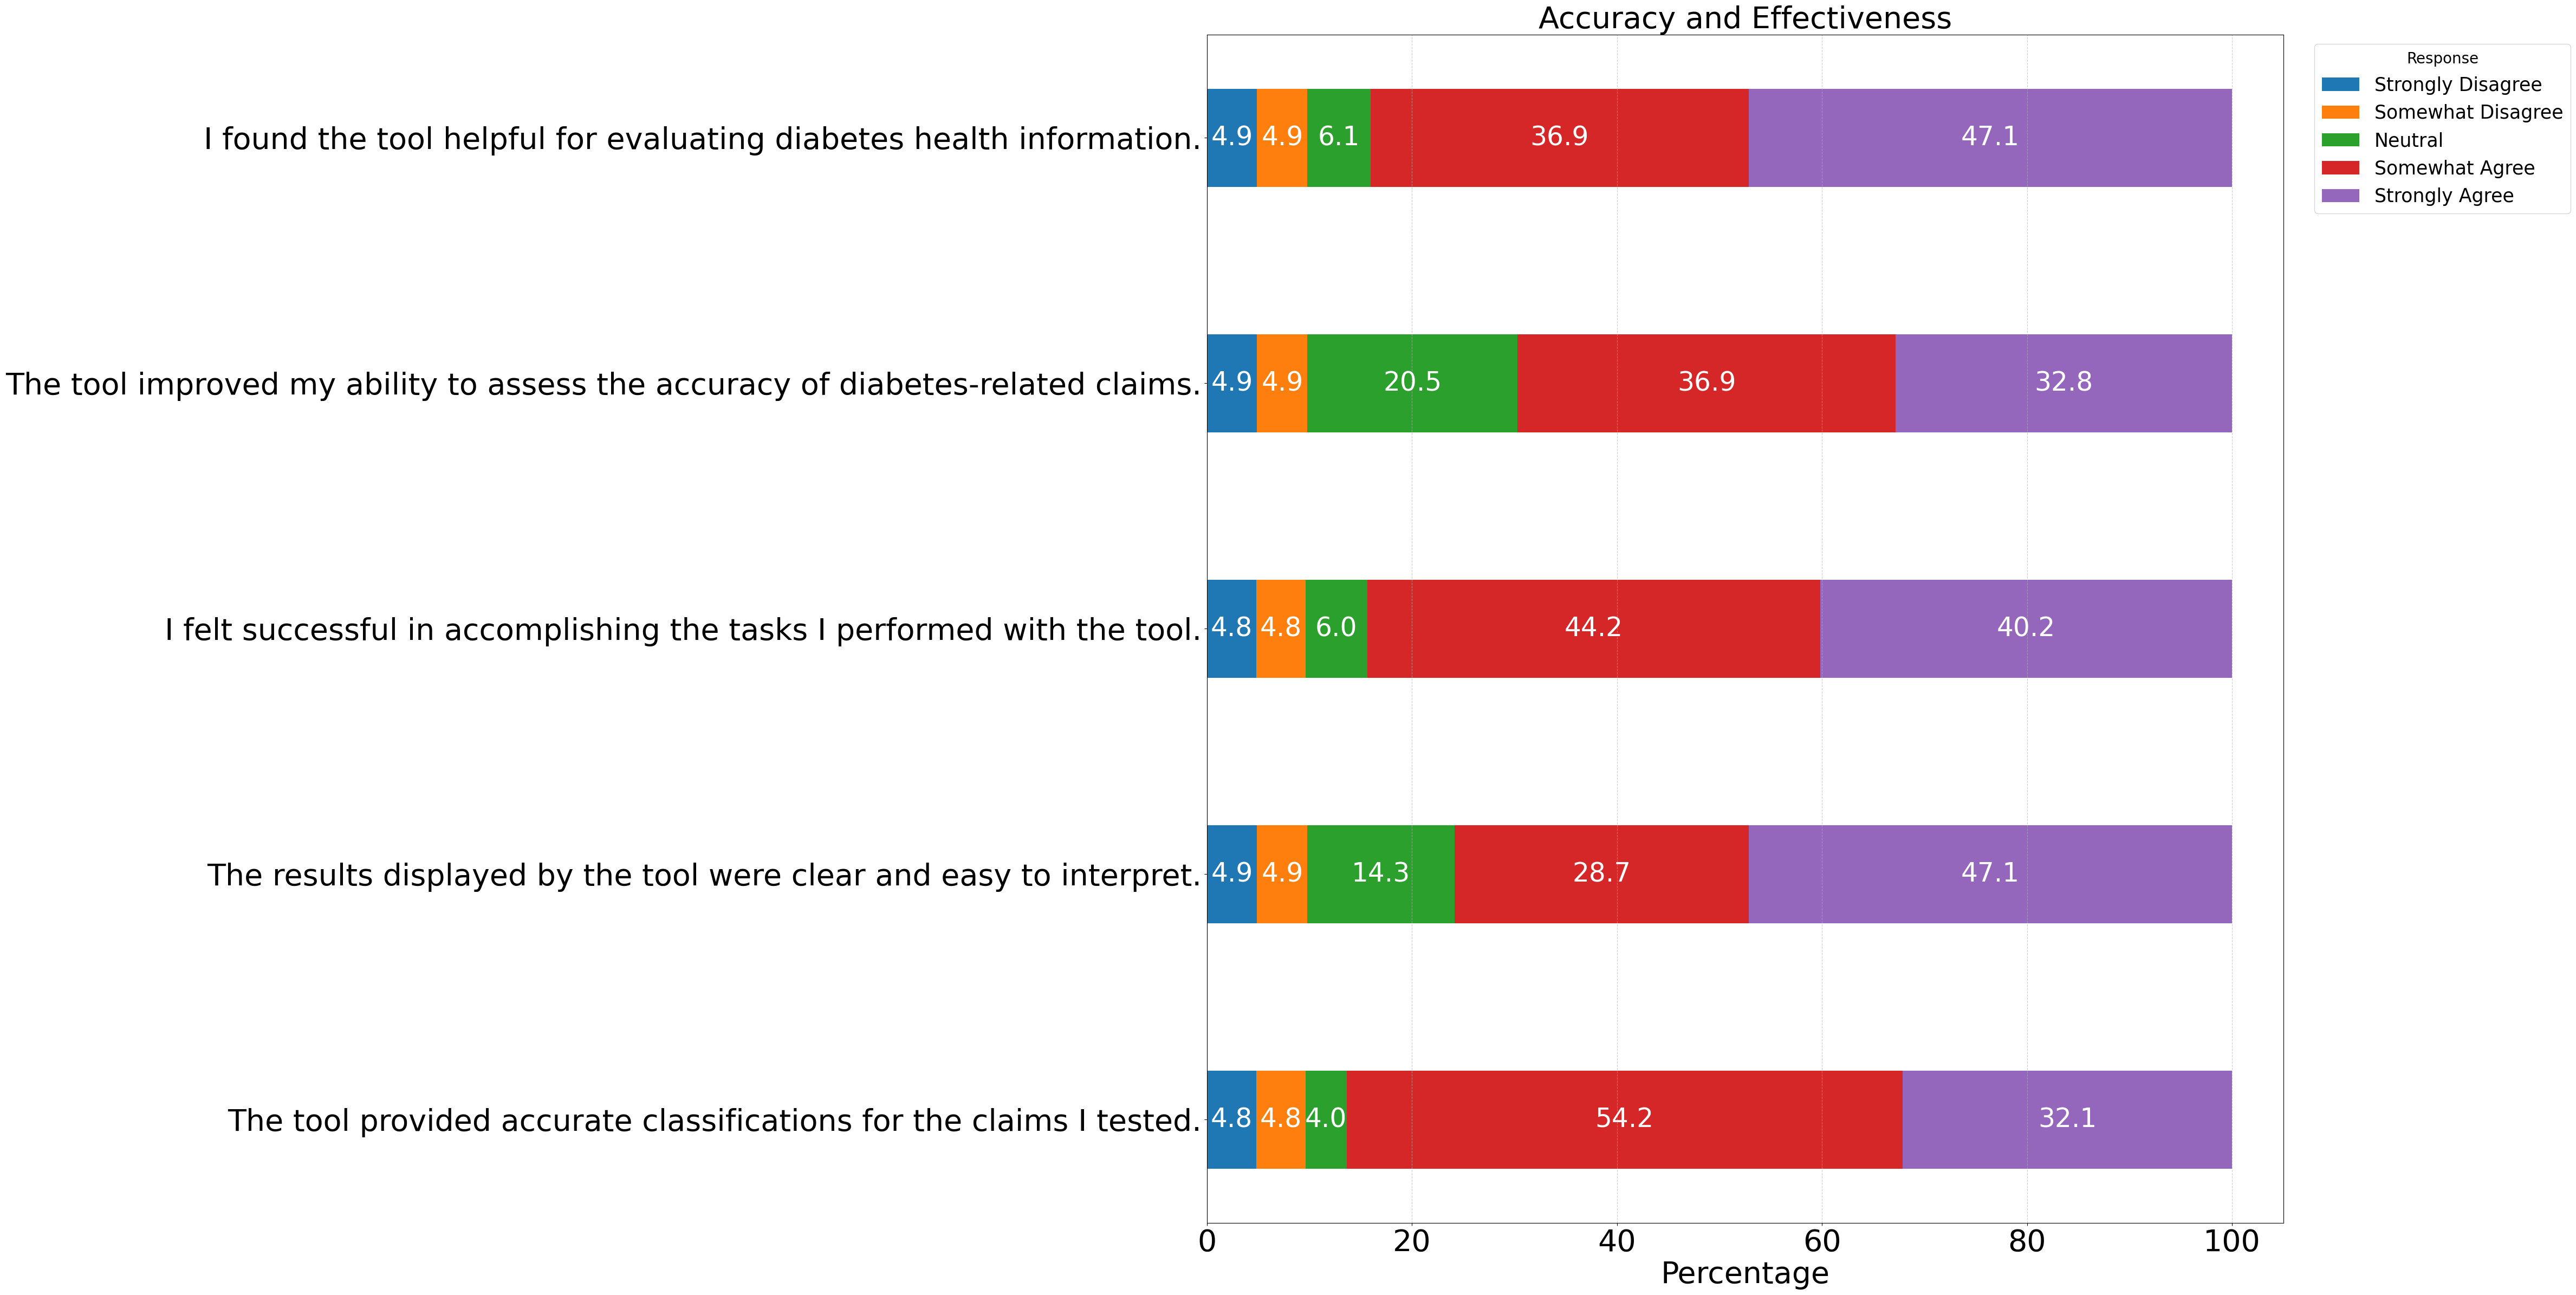

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/DiaBERT response.csv")
df_trimmed = df.drop(index=[0, 1])  # drop headers

# Define question mapping for Section 3 (Accuracy and Effectiveness)
question_texts = {
    'QID48_1': "The tool provided accurate classifications for the claims I tested.",
    'QID48_2': "The results displayed by the tool were clear and easy to interpret.",
    'QID48_3': "I felt successful in accomplishing the tasks I performed with the tool.",
    'QID48_4': "The tool improved my ability to assess the accuracy of diabetes-related claims.",
    'QID48_5': "I found the tool helpful for evaluating diabetes health information."
}

# Likert scale mapping
likert_labels = {
    1: 'Strongly Disagree',
    2: 'Somewhat Disagree',
    3: 'Neutral',
    4: 'Somewhat Agree',
    5: 'Strongly Agree'
}
likert_order = list(likert_labels.values())

# Prepare data
df_trimmed[list(question_texts.keys())] = df_trimmed[list(question_texts.keys())].apply(pd.to_numeric, errors='coerce')

# Create frequency tables
freq_tables = {}
for col in question_texts:
    cleaned = df_trimmed[col][df_trimmed[col].isin(likert_labels.keys())]
    freq = cleaned.map(likert_labels).value_counts(normalize=True).reindex(likert_order, fill_value=0) * 100
    display_freq = freq.apply(lambda x: max(x, 2.0) if x == 0 else x)  # Avoid invisible bars
    freq_tables[question_texts[col]] = display_freq

# Build chart DataFrame
chart_df = pd.DataFrame(freq_tables).T[likert_order]

# Adjust for visual consistency and normalize to 100%
for idx, row in chart_df.iterrows():
    inflation_total = 0
    for cat in ['Strongly Disagree', 'Somewhat Disagree']:
        val = row[cat]
        if 0 < val < 5.0:
            inflation = 5.0 - val
            chart_df.at[idx, cat] = 5.0
            inflation_total += inflation

    if inflation_total > 0:
        candidates = [c for c in likert_order if c not in ['Strongly Disagree', 'Somewhat Disagree']]
        total_candidate_val = row[candidates].sum()
        for cat in candidates:
            if total_candidate_val > 0:
                adjustment = (row[cat] / total_candidate_val) * inflation_total
                chart_df.at[idx, cat] -= adjustment

    # Normalize to ensure the row sums to 100%
    row_sum = chart_df.loc[idx].sum()
    if abs(row_sum - 100.0) > 0.01:
        chart_df.loc[idx] = chart_df.loc[idx] * (100.0 / row_sum)

# Plotting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
fig, ax = plt.subplots(figsize=(48, 24))
left = [0] * len(chart_df)

for i, category in enumerate(likert_order):
    vals = chart_df[category]
    bars = ax.barh(chart_df.index, vals, left=left, label=category, height=0.4, color=colors[i])
    for j, (value, lft) in enumerate(zip(vals, left)):
        text_val = f'{value:.1f}' if value > 0 else '0.0'
        ax.text(lft + value / 2, j, text_val, va='center', ha='center', fontsize=35, color='white')
    left = [x + y for x, y in zip(left, vals)]

# Axis formatting
ax.set_yticks(range(len(chart_df)))
ax.set_yticklabels(chart_df.index, fontsize=40)
ax.set_xlabel('Percentage', fontsize=40)
ax.set_title('Accuracy and Effectiveness', fontsize=40)
ax.tick_params(axis='x', labelsize=40)

ax.legend(title='Response', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=25, title_fontsize=20)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/section 3.png", dpi=600, bbox_inches="tight")


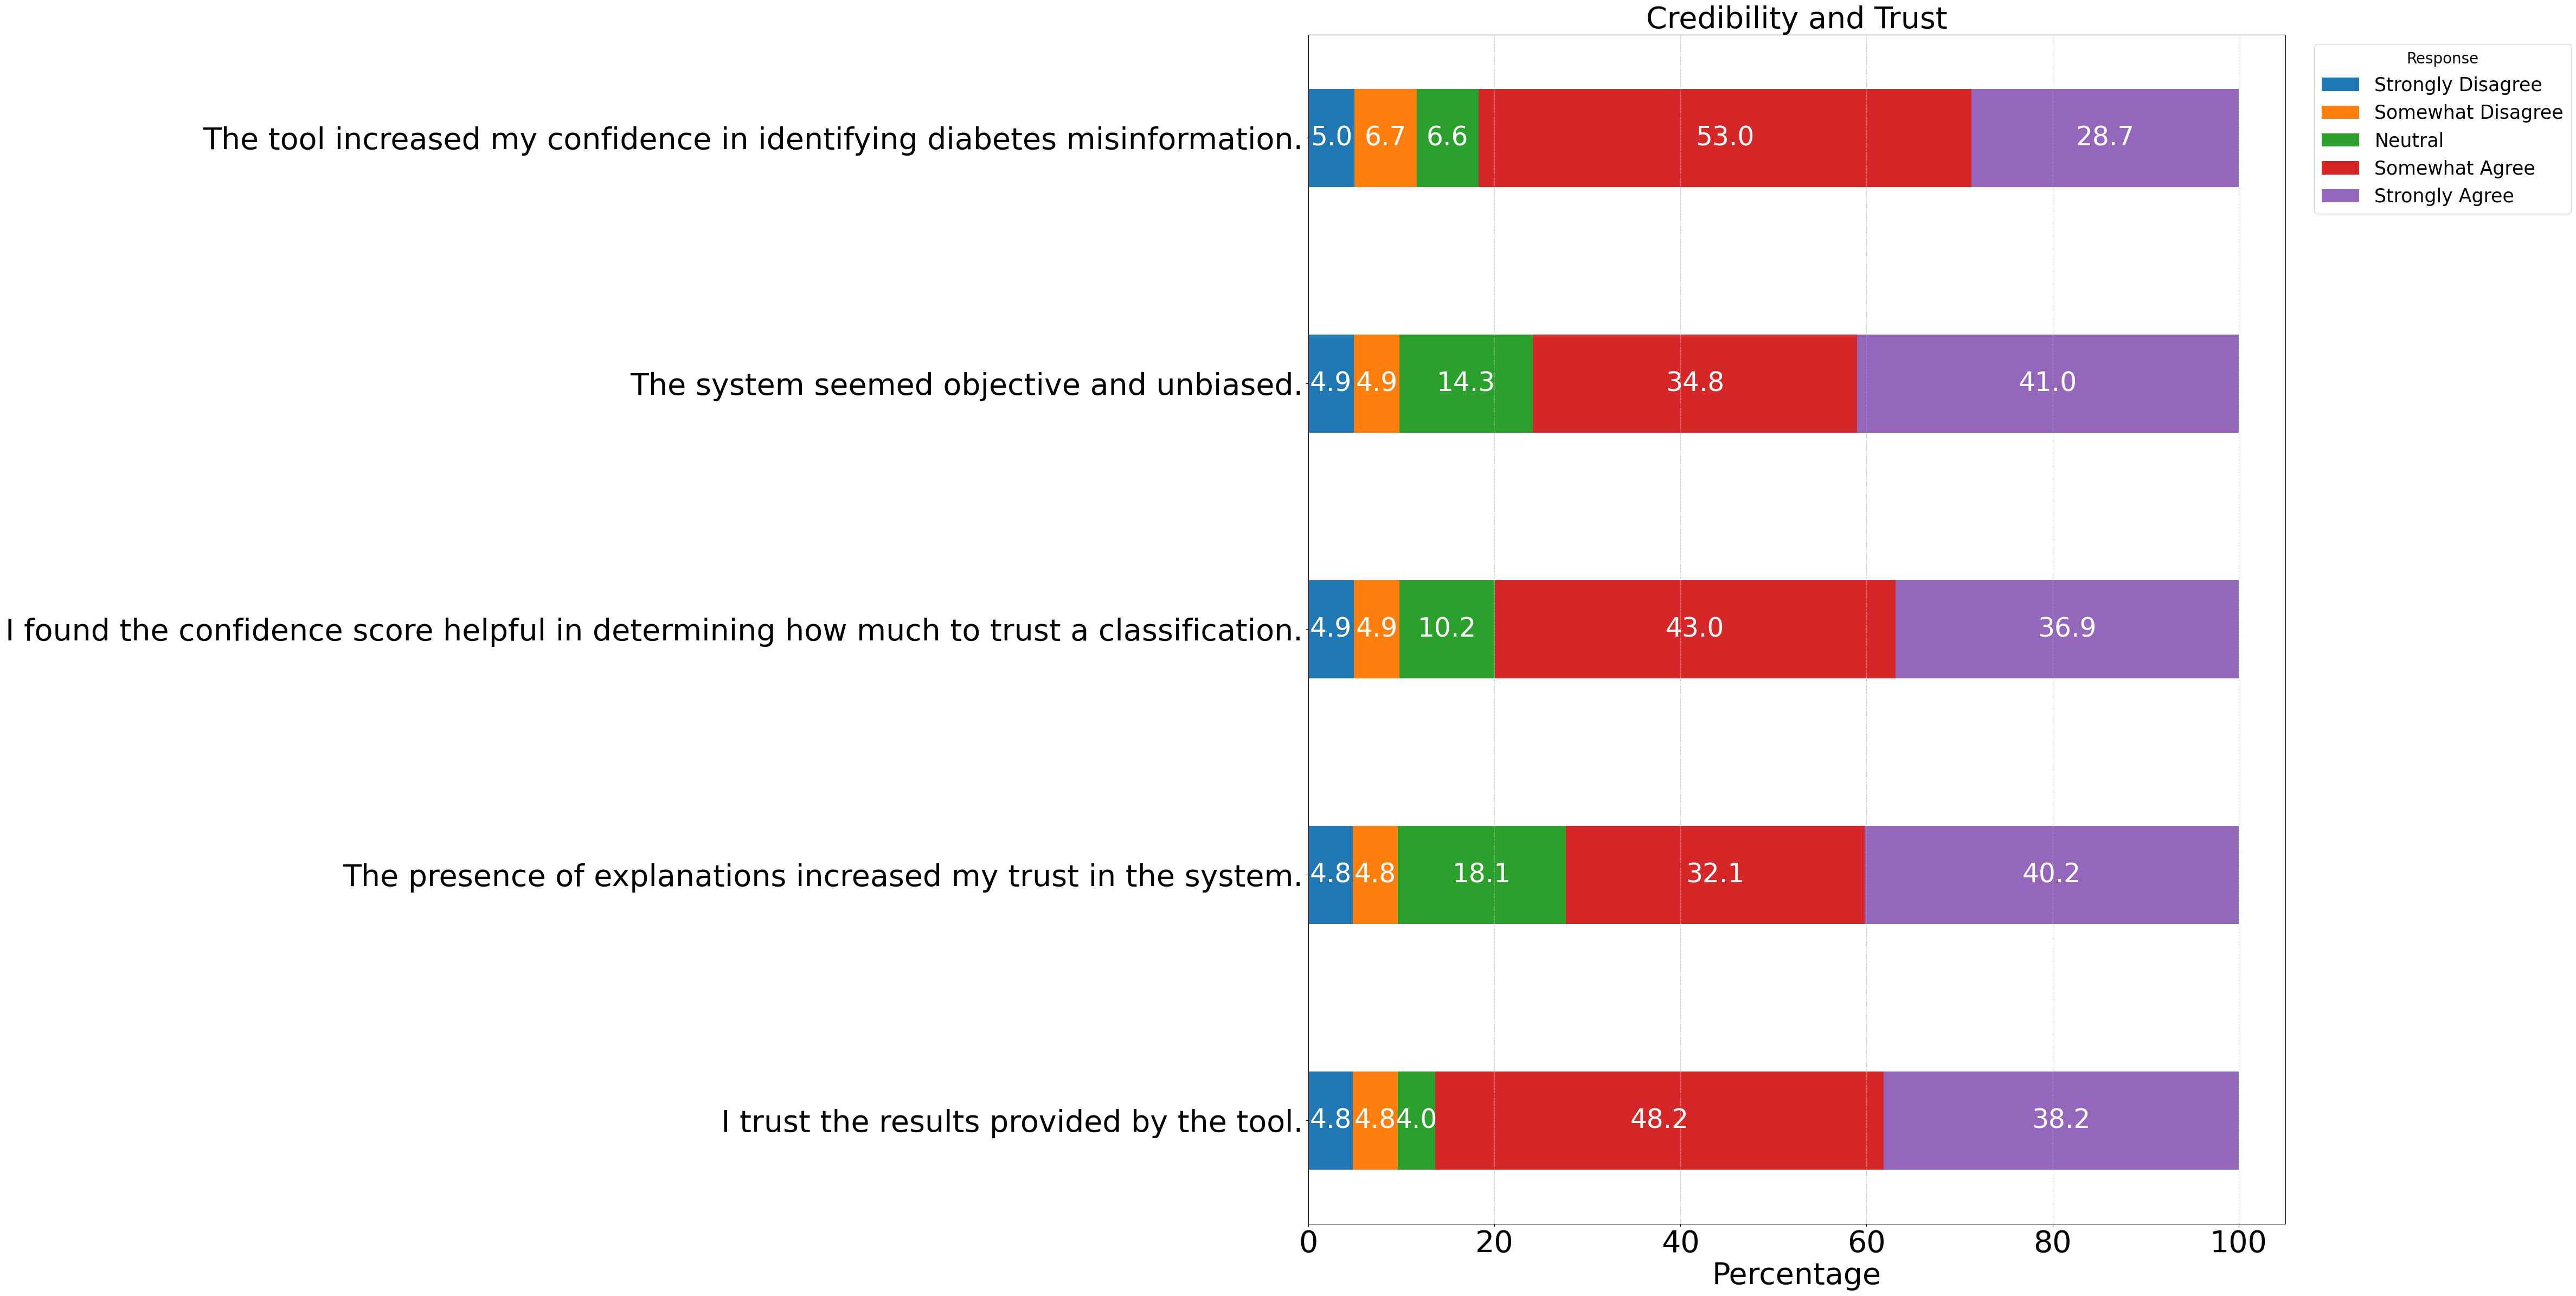

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/DiaBERT response.csv")
df_trimmed = df.drop(index=[0, 1])  # drop headers

# Define question mapping for Section 4 (Credibility and Trust)
question_texts = {
    'QID50_1': "I trust the results provided by the tool.",
    'QID50_2': "The presence of explanations increased my trust in the system.",
    'QID50_3': "I found the confidence score helpful in determining how much to trust a classification.",
    'QID50_4': "The system seemed objective and unbiased.",
    'QID50_5': "The tool increased my confidence in identifying diabetes misinformation."
}

# Likert mapping
likert_labels = {
    1: 'Strongly Disagree',
    2: 'Somewhat Disagree',
    3: 'Neutral',
    4: 'Somewhat Agree',
    5: 'Strongly Agree'
}
likert_order = list(likert_labels.values())

# Prepare data
df_trimmed[list(question_texts.keys())] = df_trimmed[list(question_texts.keys())].apply(pd.to_numeric, errors='coerce')

# Create frequency tables
freq_tables = {}
for col in question_texts:
    cleaned = df_trimmed[col][df_trimmed[col].isin(likert_labels.keys())]
    freq = cleaned.map(likert_labels).value_counts(normalize=True).reindex(likert_order, fill_value=0) * 100
    display_freq = freq.apply(lambda x: max(x, 2.0) if x == 0 else x)
    freq_tables[question_texts[col]] = display_freq

# Build chart DataFrame
chart_df = pd.DataFrame(freq_tables).T[likert_order]

# Adjust for visual consistency and normalize to 100%
for idx, row in chart_df.iterrows():
    inflation_total = 0
    for cat in ['Strongly Disagree', 'Somewhat Disagree']:
        val = row[cat]
        if 0 < val < 5.0:
            inflation = 5.0 - val
            chart_df.at[idx, cat] = 5.0
            inflation_total += inflation

    if inflation_total > 0:
        candidates = [c for c in likert_order if c not in ['Strongly Disagree', 'Somewhat Disagree']]
        total_candidate_val = row[candidates].sum()
        for cat in candidates:
            if total_candidate_val > 0:
                adjustment = (row[cat] / total_candidate_val) * inflation_total
                chart_df.at[idx, cat] -= adjustment

    # Normalize to 100% just in case
    row_sum = chart_df.loc[idx].sum()
    if abs(row_sum - 100.0) > 0.01:
        chart_df.loc[idx] = chart_df.loc[idx] * (100.0 / row_sum)

# Plotting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
fig, ax = plt.subplots(figsize=(48, 24))
left = [0] * len(chart_df)

for i, category in enumerate(likert_order):
    vals = chart_df[category]
    bars = ax.barh(chart_df.index, vals, left=left, label=category, height=0.4, color=colors[i])
    for j, (value, lft) in enumerate(zip(vals, left)):
        text_val = f'{value:.1f}' if value > 0 else '0.0'
        ax.text(lft + value / 2, j, text_val, va='center', ha='center', fontsize=35, color='white')
    left = [x + y for x, y in zip(left, vals)]

# Axis formatting
ax.set_yticks(range(len(chart_df)))
ax.set_yticklabels(chart_df.index, fontsize=40)
ax.set_xlabel('Percentage', fontsize=40)
ax.set_title('Credibility and Trust', fontsize=40)
ax.tick_params(axis='x', labelsize=40)

ax.legend(title='Response', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=25, title_fontsize=20)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/section 4.png", dpi=600, bbox_inches="tight")


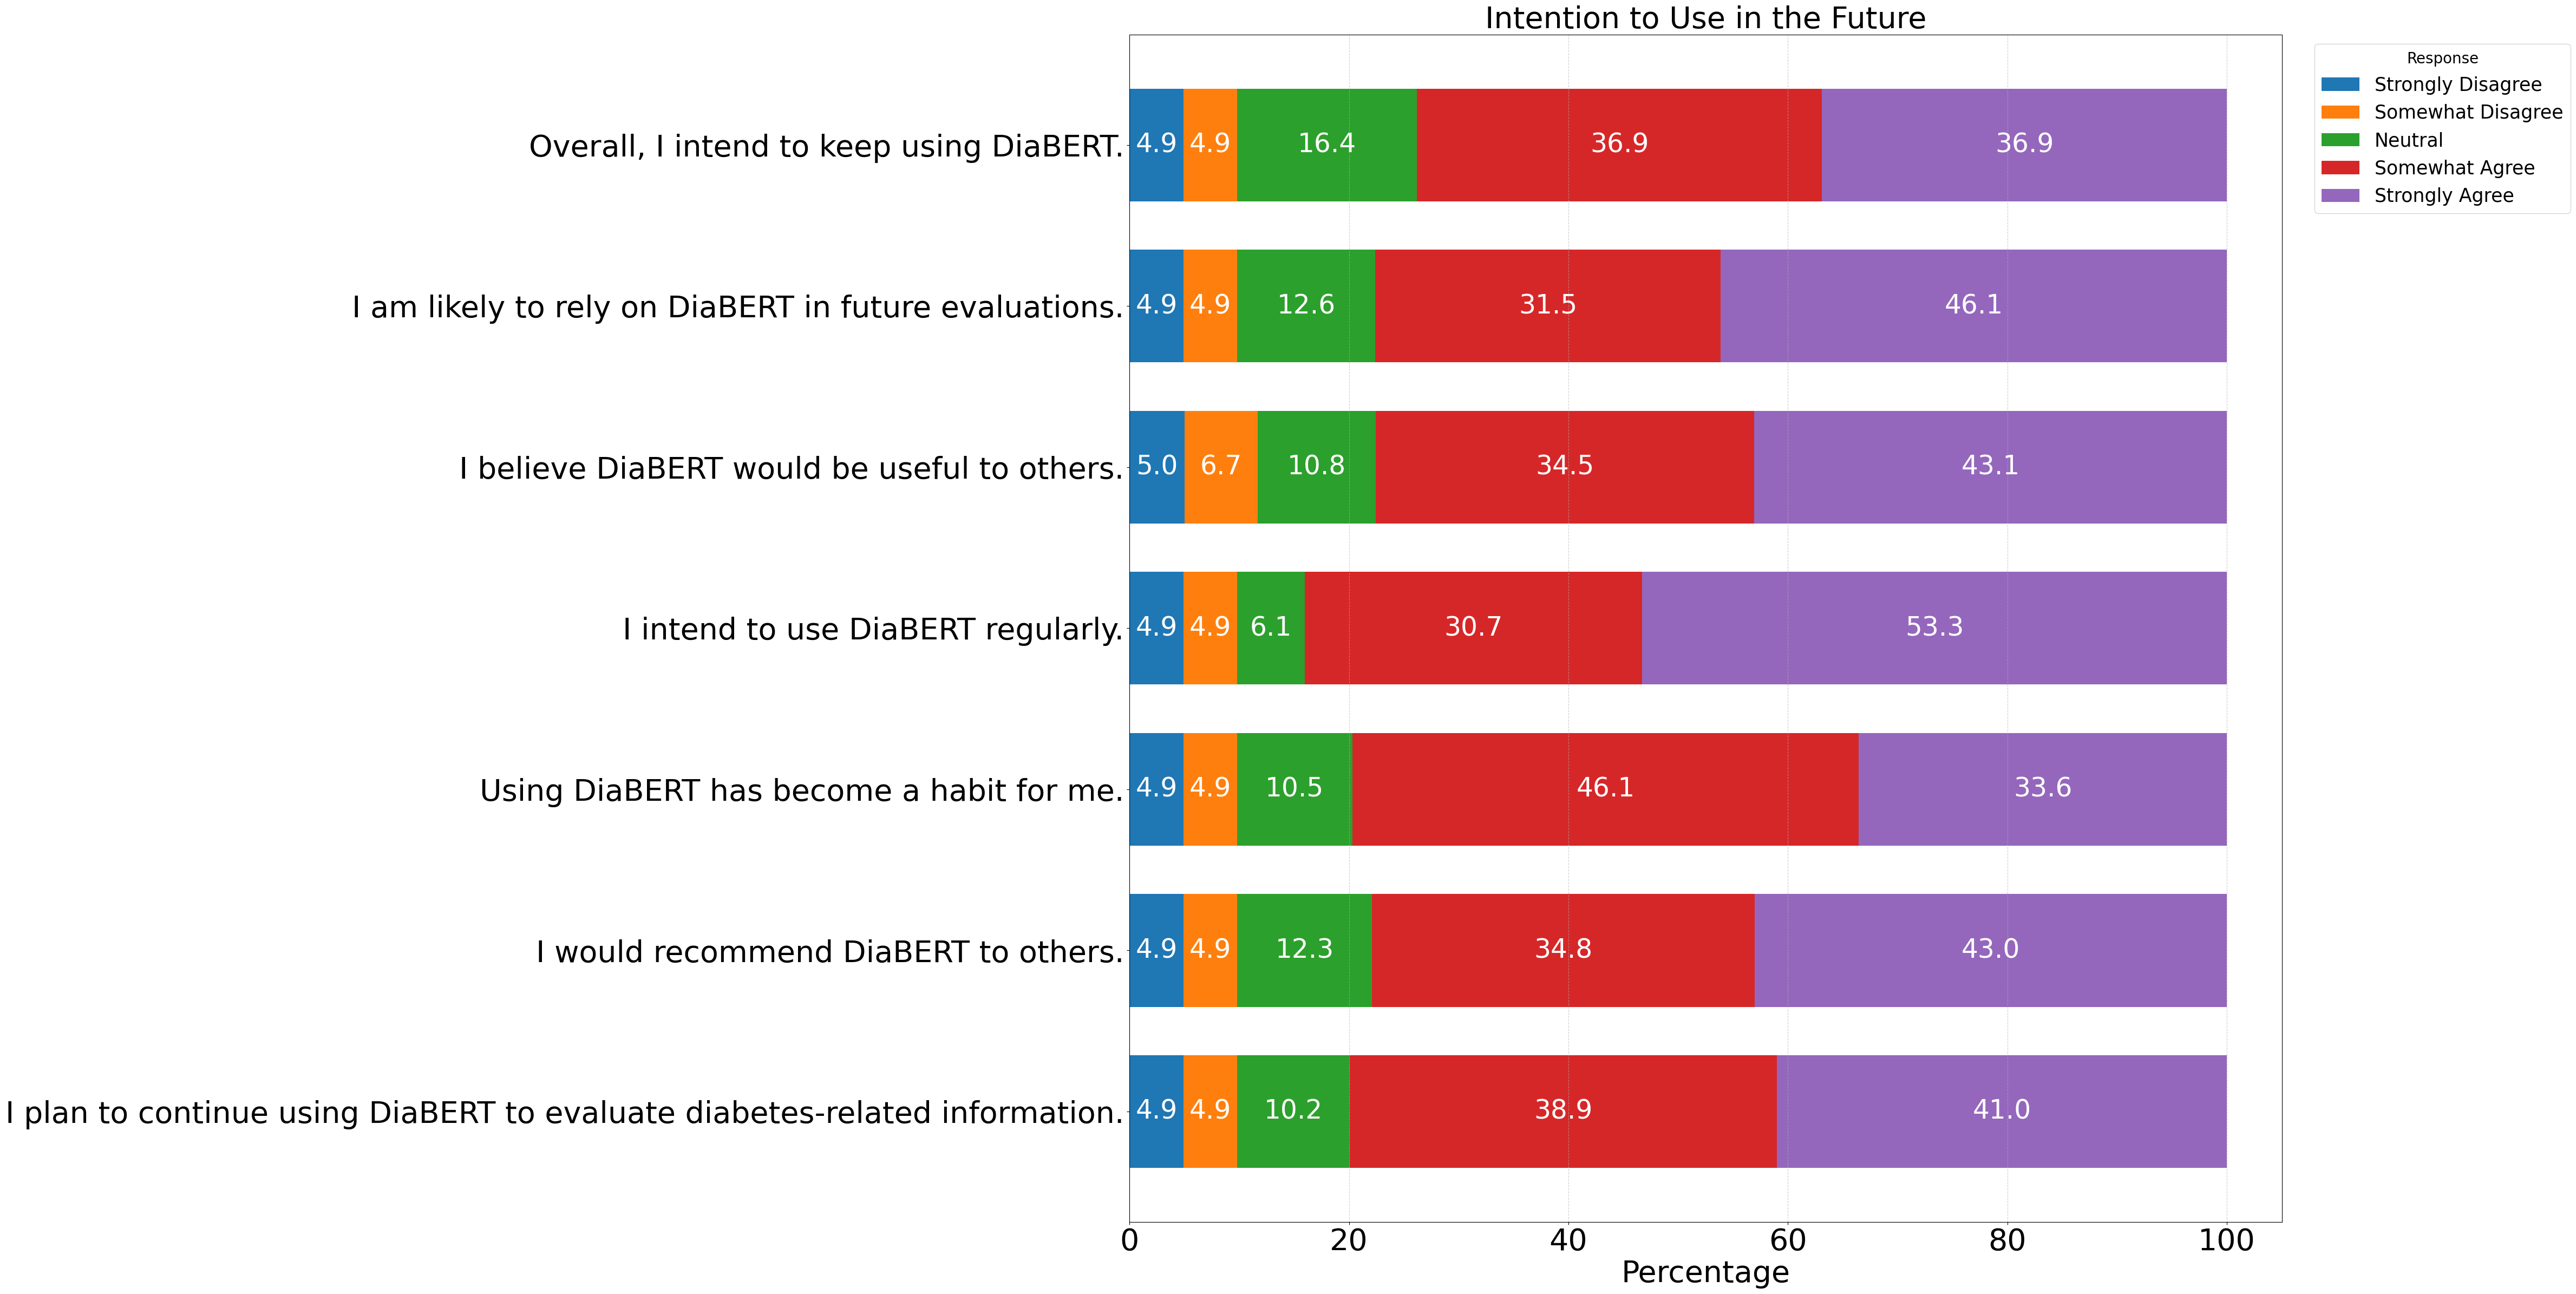

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/DiaBERT response.csv")
df_trimmed = df.drop(index=[0, 1])  # drop headers

# Define question mapping for Section 5 (Intention to Use in the Future)
question_texts = {
    'QID46_1': "I plan to continue using DiaBERT to evaluate diabetes-related information.",
    'QID46_2': "I would recommend DiaBERT to others.",
    'QID46_3': "Using DiaBERT has become a habit for me.",
    'QID46_4': "I intend to use DiaBERT regularly.",
    'QID46_5': "I believe DiaBERT would be useful to others.",
    'QID46_6': "I am likely to rely on DiaBERT in future evaluations.",
    'QID46_7': "Overall, I intend to keep using DiaBERT."
}

# Likert mapping
likert_labels = {
    1: 'Strongly Disagree',
    2: 'Somewhat Disagree',
    3: 'Neutral',
    4: 'Somewhat Agree',
    5: 'Strongly Agree'
}
likert_order = list(likert_labels.values())

# Prepare data
df_trimmed[list(question_texts.keys())] = df_trimmed[list(question_texts.keys())].apply(pd.to_numeric, errors='coerce')

# Create frequency tables
freq_tables = {}
for col in question_texts:
    cleaned = df_trimmed[col][df_trimmed[col].isin(likert_labels.keys())]
    freq = cleaned.map(likert_labels).value_counts(normalize=True).reindex(likert_order, fill_value=0) * 100
    display_freq = freq.apply(lambda x: max(x, 2.0) if x == 0 else x)
    freq_tables[question_texts[col]] = display_freq

# Build chart DataFrame
chart_df = pd.DataFrame(freq_tables).T[likert_order]

# Adjust for visual consistency and normalize to 100%
for idx, row in chart_df.iterrows():
    inflation_total = 0
    for cat in ['Strongly Disagree', 'Somewhat Disagree']:
        val = row[cat]
        if 0 < val < 5.0:
            inflation = 5.0 - val
            chart_df.at[idx, cat] = 5.0
            inflation_total += inflation

    if inflation_total > 0:
        candidates = [c for c in likert_order if c not in ['Strongly Disagree', 'Somewhat Disagree']]
        total_candidate_val = row[candidates].sum()
        for cat in candidates:
            if total_candidate_val > 0:
                adjustment = (row[cat] / total_candidate_val) * inflation_total
                chart_df.at[idx, cat] -= adjustment

    # Final safeguard: normalize row to sum exactly 100%
    row_sum = chart_df.loc[idx].sum()
    if abs(row_sum - 100.0) > 0.01:
        chart_df.loc[idx] = chart_df.loc[idx] * (100.0 / row_sum)

# Plotting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
fig, ax = plt.subplots(figsize=(48, 24))
left = [0] * len(chart_df)

for i, category in enumerate(likert_order):
    vals = chart_df[category]
    bars = ax.barh(chart_df.index, vals, left=left, label=category, height=0.7, color=colors[i])
    for j, (value, lft) in enumerate(zip(vals, left)):
        text_val = f'{value:.1f}' if value > 0 else '0.0'
        ax.text(lft + value / 2, j, text_val, va='center', ha='center', fontsize=35, color='white')
    left = [x + y for x, y in zip(left, vals)]

# Axis formatting
ax.set_yticks(range(len(chart_df)))
ax.set_yticklabels(chart_df.index, fontsize=40)
ax.set_xlabel('Percentage', fontsize=40)
ax.set_title('Intention to Use in the Future', fontsize=40)
ax.tick_params(axis='x', labelsize=40)

ax.legend(title='Response', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=25, title_fontsize=20)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/section 5.png", dpi=600, bbox_inches="tight")


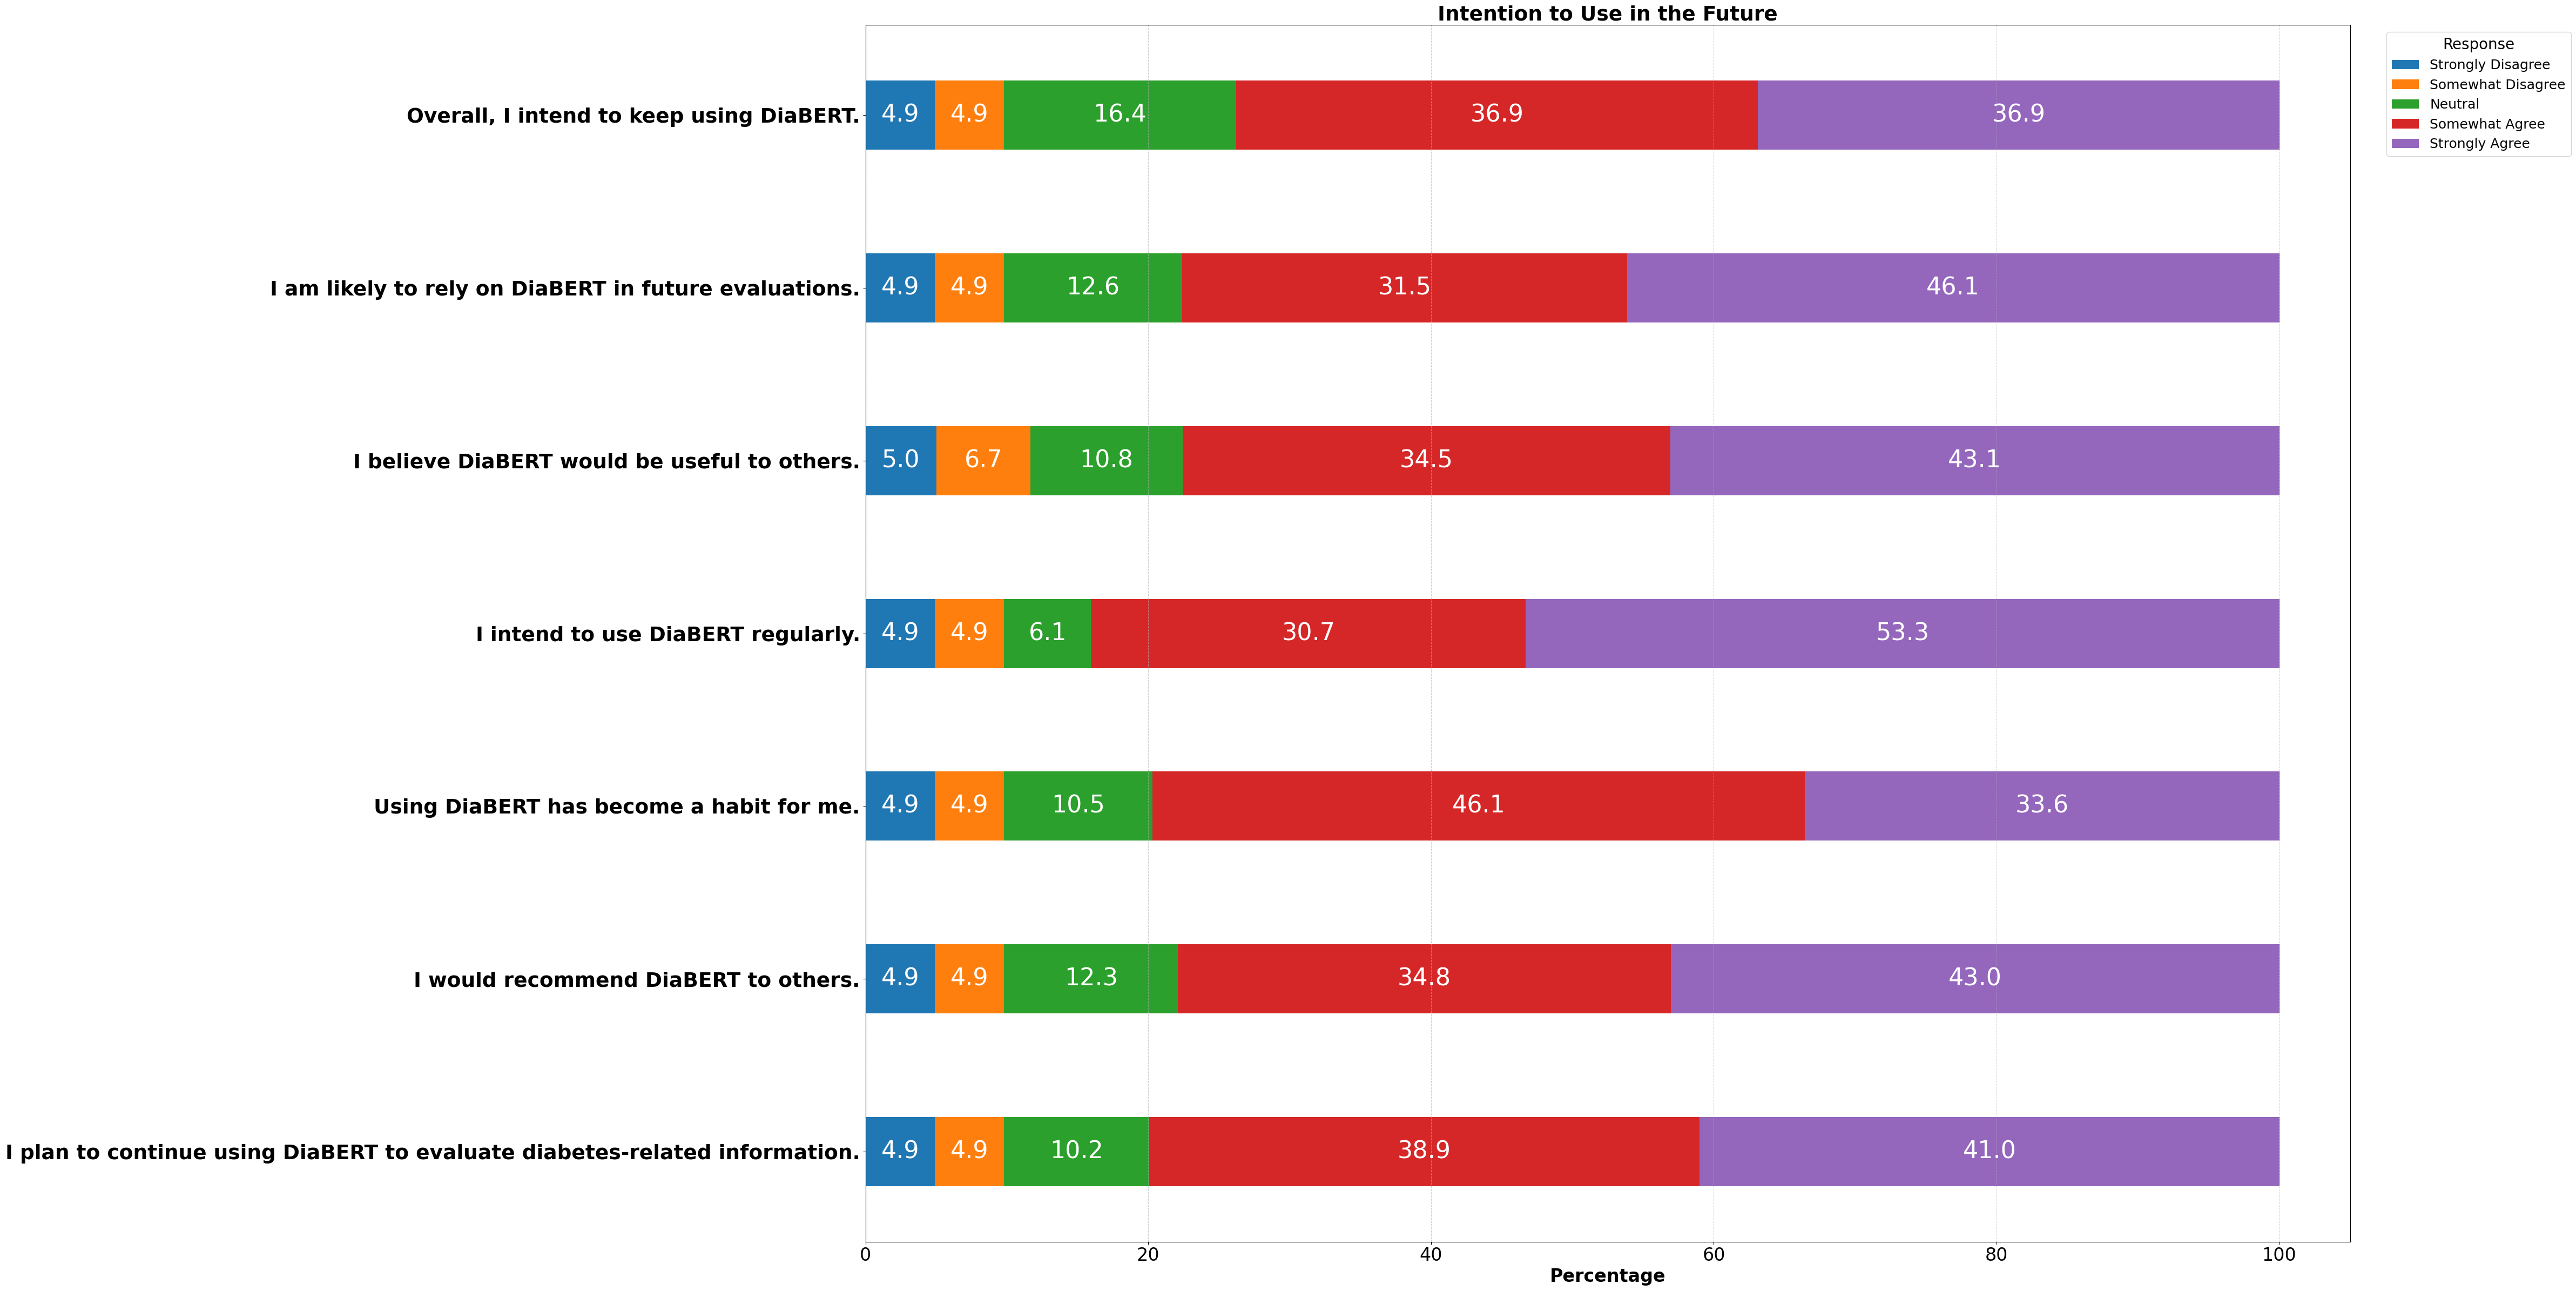

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/DiaBERT response.csv")
df_trimmed = df.drop(index=[0, 1])  # drop headers

# Define question mapping for Section 5 (Intention to Use in the Future)
question_texts = {
    'QID46_1': "I plan to continue using DiaBERT to evaluate diabetes-related information.",
    'QID46_2': "I would recommend DiaBERT to others.",
    'QID46_3': "Using DiaBERT has become a habit for me.",
    'QID46_4': "I intend to use DiaBERT regularly.",
    'QID46_5': "I believe DiaBERT would be useful to others.",
    'QID46_6': "I am likely to rely on DiaBERT in future evaluations.",
    'QID46_7': "Overall, I intend to keep using DiaBERT."
}

# Likert mapping
likert_labels = {
    1: 'Strongly Disagree',
    2: 'Somewhat Disagree',
    3: 'Neutral',
    4: 'Somewhat Agree',
    5: 'Strongly Agree'
}
likert_order = list(likert_labels.values())

# Prepare data
df_trimmed[list(question_texts.keys())] = df_trimmed[list(question_texts.keys())].apply(pd.to_numeric, errors='coerce')

# Create frequency tables
freq_tables = {}
for col in question_texts:
    cleaned = df_trimmed[col][df_trimmed[col].isin(likert_labels.keys())]
    freq = cleaned.map(likert_labels).value_counts(normalize=True).reindex(likert_order, fill_value=0) * 100
    display_freq = freq.apply(lambda x: max(x, 2.0) if x == 0 else x)
    freq_tables[question_texts[col]] = display_freq

# Build chart DataFrame
chart_df = pd.DataFrame(freq_tables).T[likert_order]

# Adjust for visual consistency and normalize to 100%
for idx, row in chart_df.iterrows():
    inflation_total = 0
    for cat in ['Strongly Disagree', 'Somewhat Disagree']:
        val = row[cat]
        if 0 < val < 5.0:
            inflation = 5.0 - val
            chart_df.at[idx, cat] = 5.0
            inflation_total += inflation

    if inflation_total > 0:
        candidates = [c for c in likert_order if c not in ['Strongly Disagree', 'Somewhat Disagree']]
        total_candidate_val = row[candidates].sum()
        for cat in candidates:
            if total_candidate_val > 0:
                adjustment = (row[cat] / total_candidate_val) * inflation_total
                chart_df.at[idx, cat] -= adjustment

    # Final safeguard: normalize row to sum exactly 100%
    row_sum = chart_df.loc[idx].sum()
    if abs(row_sum - 100.0) > 0.01:
        chart_df.loc[idx] = chart_df.loc[idx] * (100.0 / row_sum)

# Plotting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
fig, ax = plt.subplots(figsize=(48, 24))
left = [0] * len(chart_df)

for i, category in enumerate(likert_order):
    vals = chart_df[category]
    bars = ax.barh(chart_df.index, vals, left=left, label=category, height=0.4, color=colors[i])
    for j, (value, lft) in enumerate(zip(vals, left)):
        text_val = f'{value:.1f}' if value > 0 else '0.0'
        ax.text(lft + value / 2, j, text_val, va='center', ha='center', fontsize=32, color='white')
    left = [x + y for x, y in zip(left, vals)]

# Axis formatting
ax.set_yticks(range(len(chart_df)))
ax.set_yticklabels(chart_df.index, fontsize=27, fontweight='bold')
ax.set_xlabel('Percentage', fontsize=24, fontweight='bold')
ax.set_title('Intention to Use in the Future', fontsize=27, fontweight='bold')
ax.tick_params(axis='x', labelsize=24)

ax.legend(title='Response', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=18, title_fontsize=20)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig("/content/drive/MyDrive/section 5.png", dpi=600, bbox_inches="tight")


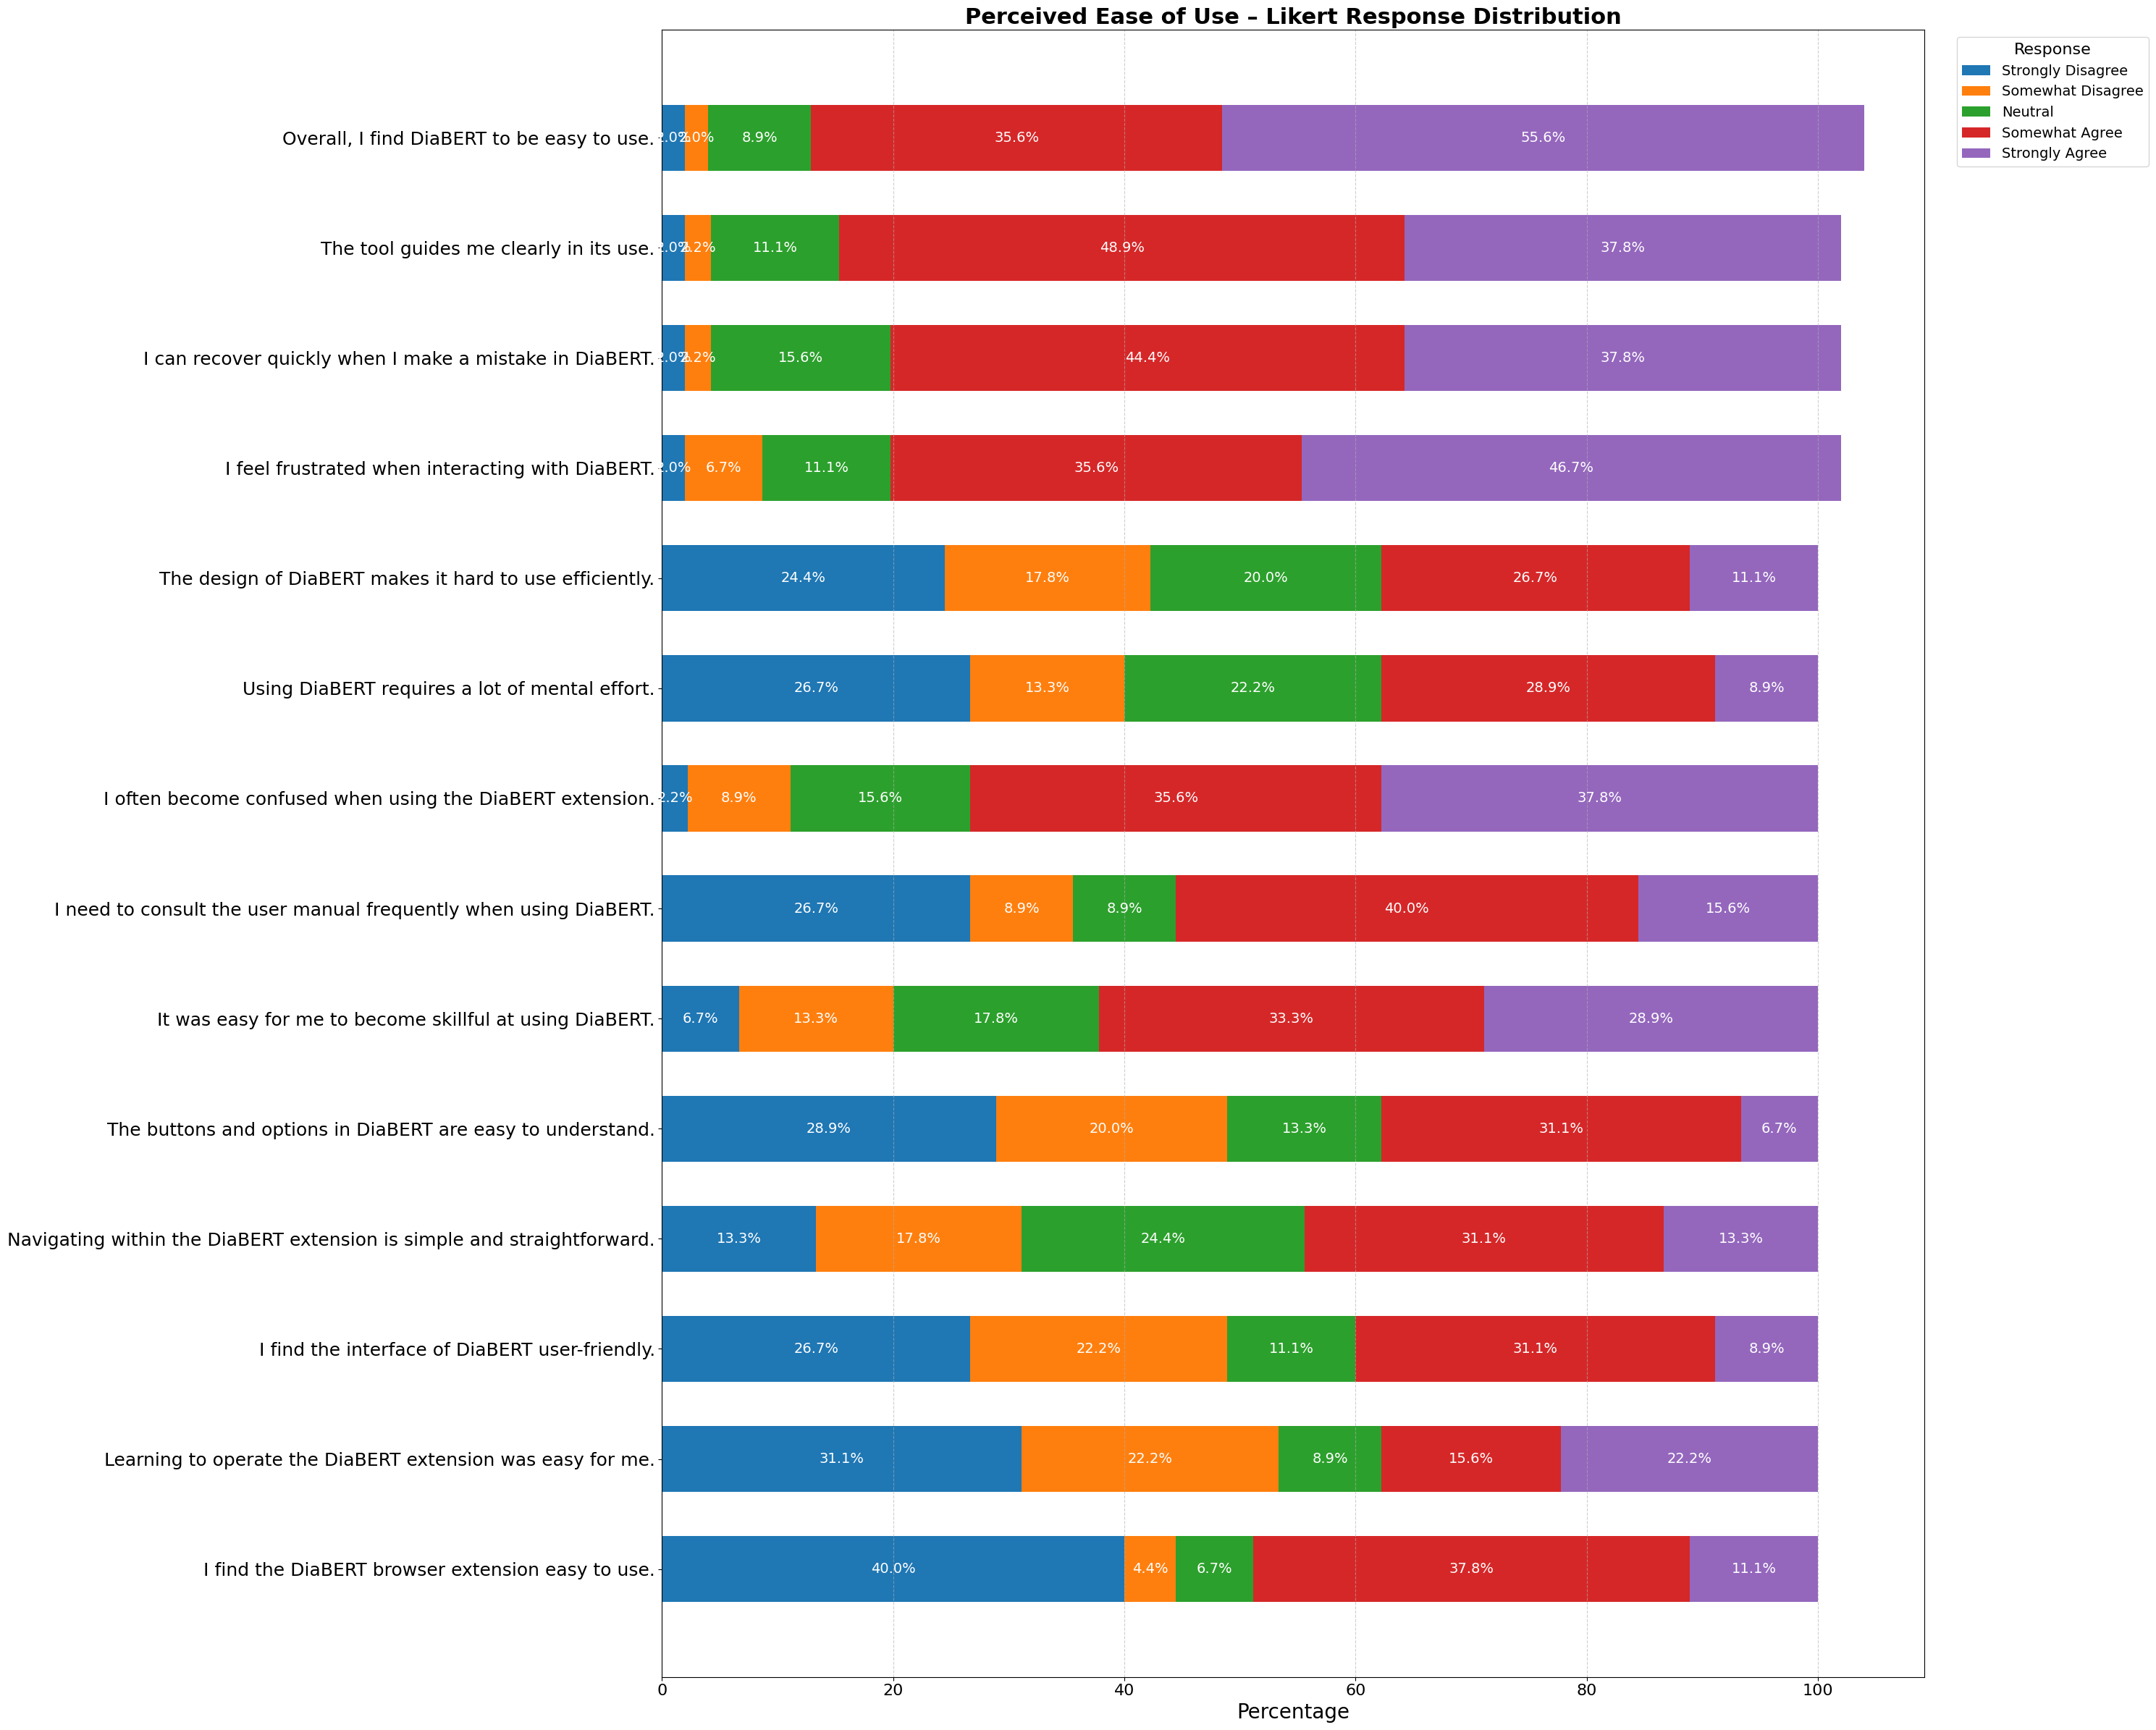

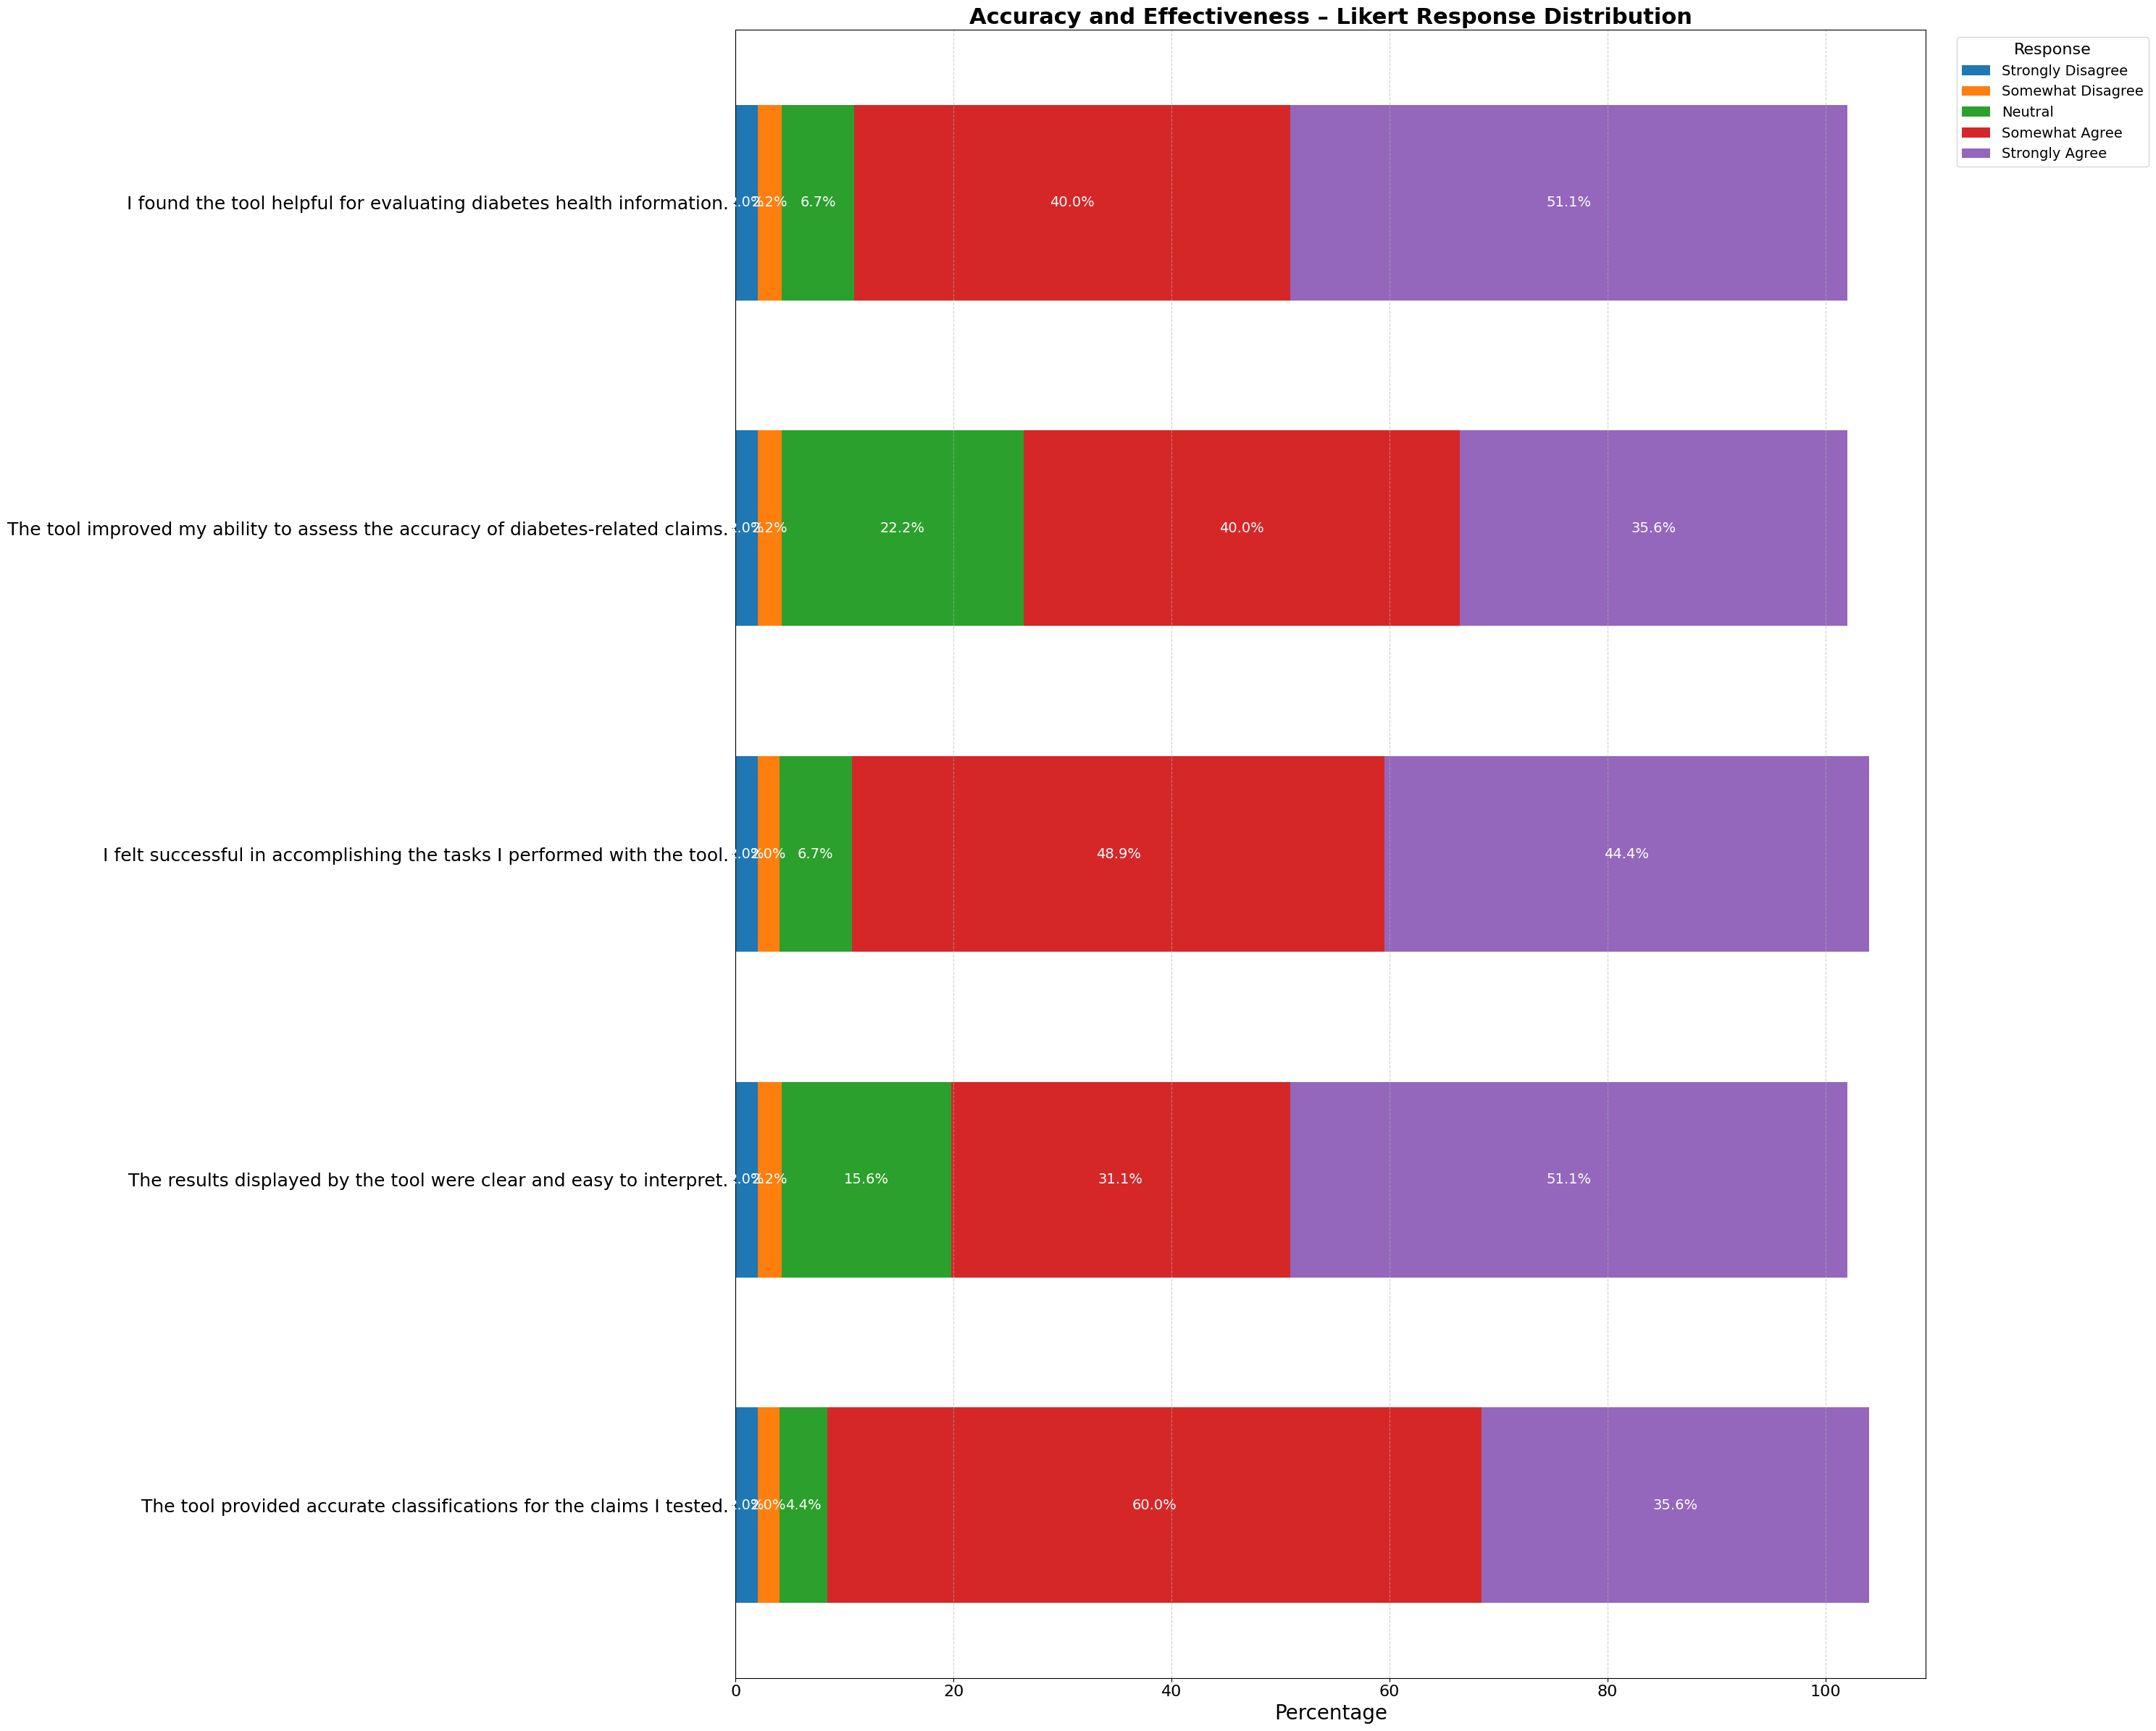

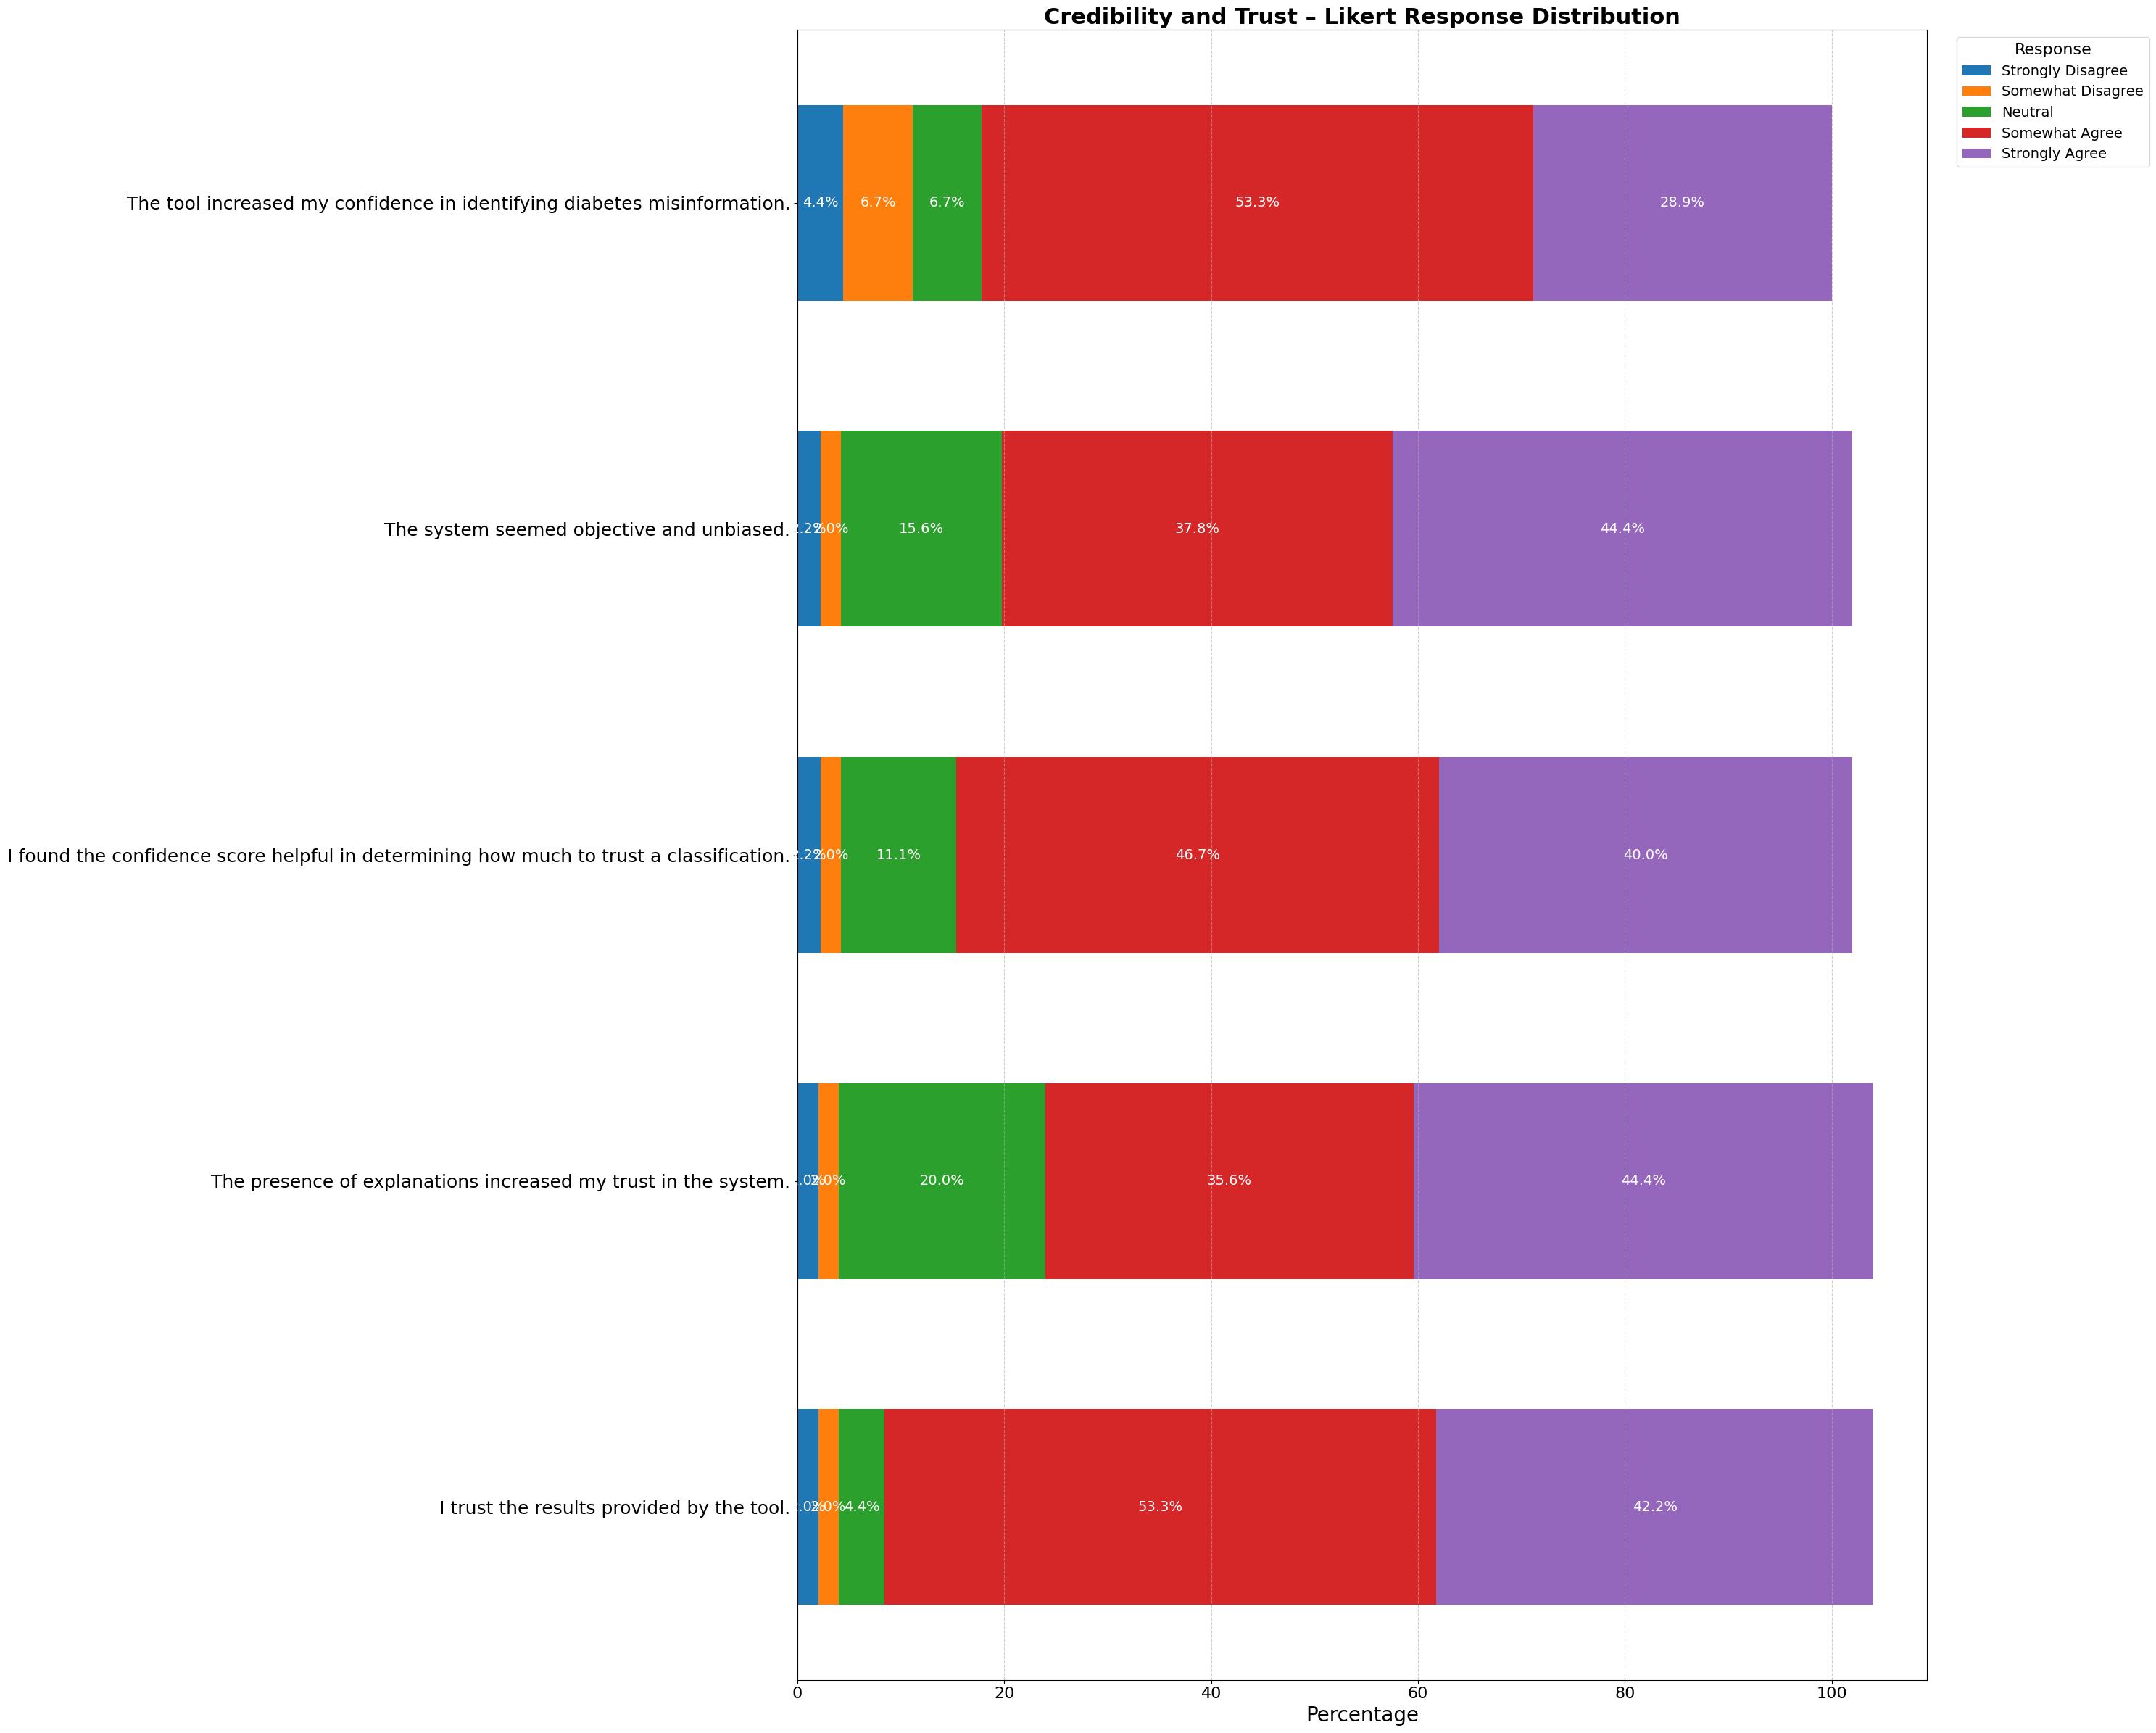

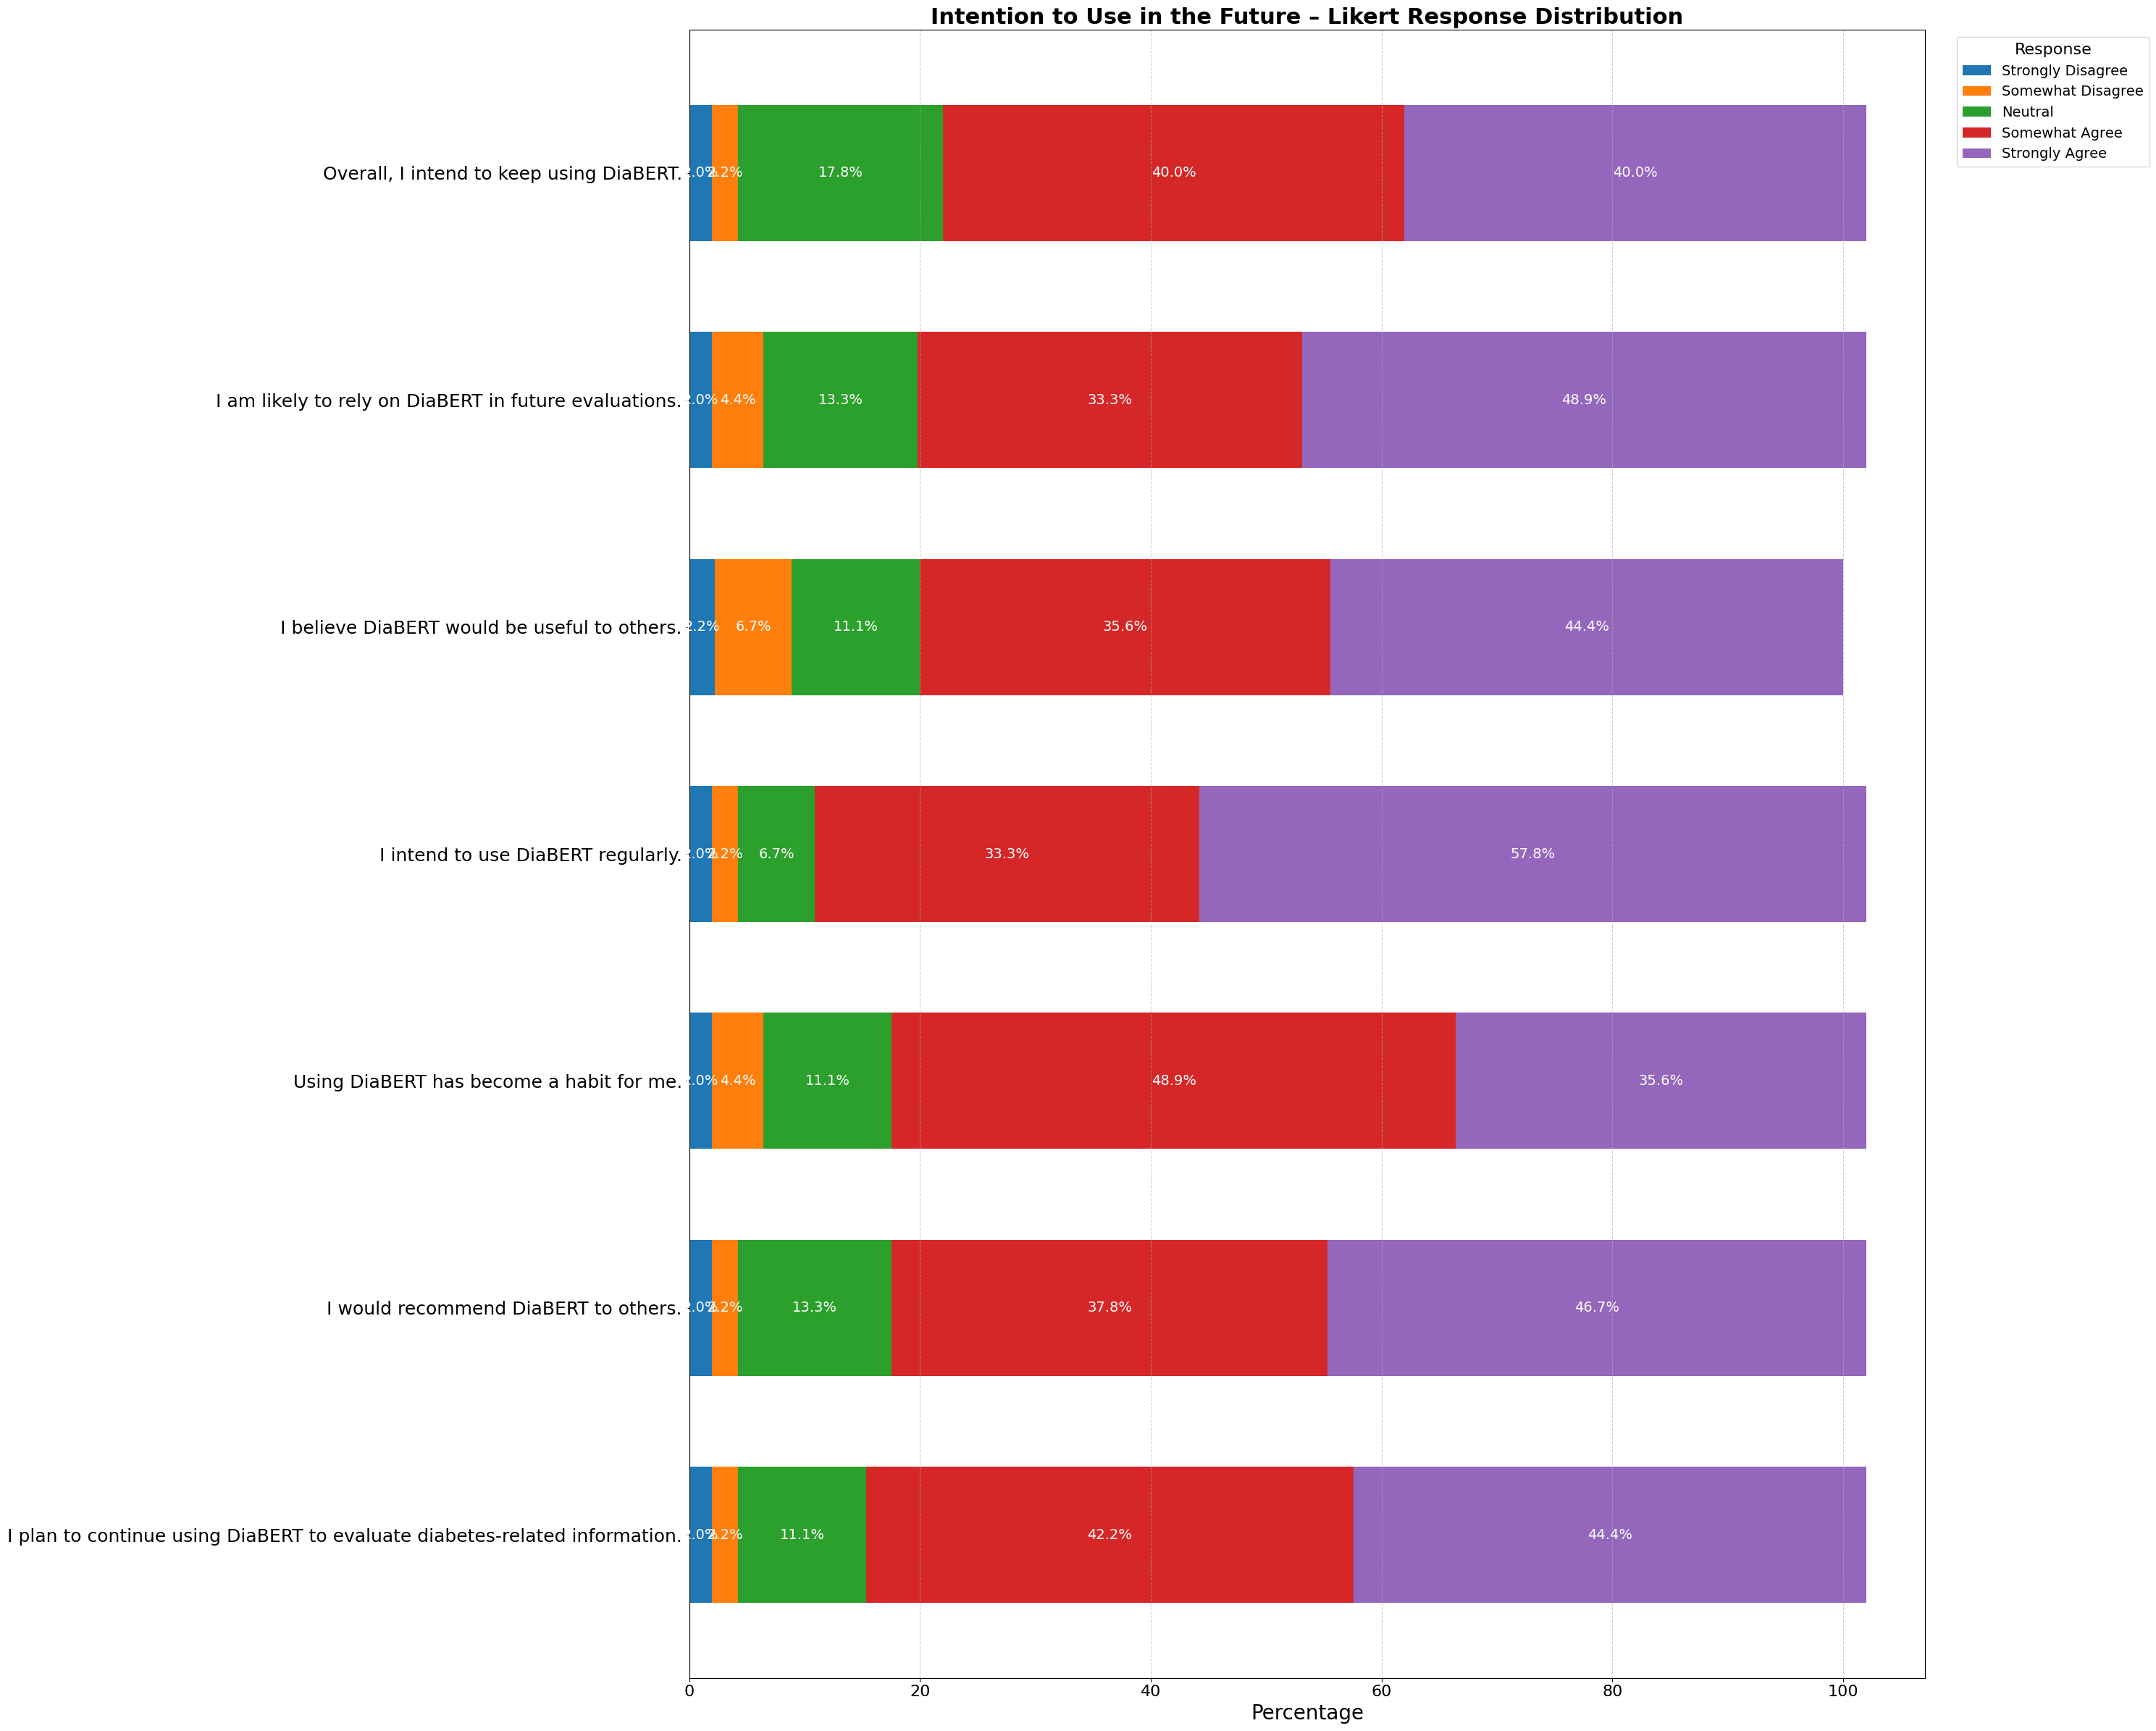

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/DiaBERT response.csv")
df_trimmed = df.drop(index=[0, 1])

# Likert scale labels
likert_labels = {
    1: 'Strongly Disagree',
    2: 'Somewhat Disagree',
    3: 'Neutral',
    4: 'Somewhat Agree',
    5: 'Strongly Agree'
}
likert_order = list(likert_labels.values())
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Section mapping
section_blocks = {
    "Perceived Ease of Use": {
        "prefix": "QID44_",
        "questions": [
            "I find the DiaBERT browser extension easy to use.",
            "Learning to operate the DiaBERT extension was easy for me.",
            "I find the interface of DiaBERT user-friendly.",
            "Navigating within the DiaBERT extension is simple and straightforward.",
            "The buttons and options in DiaBERT are easy to understand.",
            "It was easy for me to become skillful at using DiaBERT.",
            "I need to consult the user manual frequently when using DiaBERT.",
            "I often become confused when using the DiaBERT extension.",
            "Using DiaBERT requires a lot of mental effort.",
            "The design of DiaBERT makes it hard to use efficiently.",
            "I feel frustrated when interacting with DiaBERT.",
            "I can recover quickly when I make a mistake in DiaBERT.",
            "The tool guides me clearly in its use.",
            "Overall, I find DiaBERT to be easy to use."
        ]
    },
    "Accuracy and Effectiveness": {
        "prefix": "QID48_",
        "questions": [
            "The tool provided accurate classifications for the claims I tested.",
            "The results displayed by the tool were clear and easy to interpret.",
            "I felt successful in accomplishing the tasks I performed with the tool.",
            "The tool improved my ability to assess the accuracy of diabetes-related claims.",
            "I found the tool helpful for evaluating diabetes health information."
        ]
    },
    "Credibility and Trust": {
        "prefix": "QID50_",
        "questions": [
            "I trust the results provided by the tool.",
            "The presence of explanations increased my trust in the system.",
            "I found the confidence score helpful in determining how much to trust a classification.",
            "The system seemed objective and unbiased.",
            "The tool increased my confidence in identifying diabetes misinformation."
        ]
    },
    "Intention to Use in the Future": {
        "prefix": "QID46_",
        "questions": [
            "I plan to continue using DiaBERT to evaluate diabetes-related information.",
            "I would recommend DiaBERT to others.",
            "Using DiaBERT has become a habit for me.",
            "I intend to use DiaBERT regularly.",
            "I believe DiaBERT would be useful to others.",
            "I am likely to rely on DiaBERT in future evaluations.",
            "Overall, I intend to keep using DiaBERT."
        ]
    }
}

# Convert response columns to numeric
for section in section_blocks.values():
    keys = [section["prefix"] + str(i + 1) for i in range(len(section["questions"]))]
    df_trimmed[keys] = df_trimmed[keys].apply(pd.to_numeric, errors='coerce')

# Loop through each section and plot
for section_name, section in section_blocks.items():
    keys = [section["prefix"] + str(i + 1) for i in range(len(section["questions"]))]
    text_map = dict(zip(keys, section["questions"]))
    freq_tables = {}

    for col in keys:
        cleaned = df_trimmed[col][df_trimmed[col].isin(likert_labels.keys())]
        freq = cleaned.map(likert_labels).value_counts(normalize=True).reindex(likert_order, fill_value=0) * 100
        display_freq = freq.apply(lambda x: max(x, 2.0) if x == 0 else x)
        freq_tables[text_map[col]] = display_freq

    chart_df = pd.DataFrame(freq_tables).T[likert_order]

    # Plot
    fig, ax = plt.subplots(figsize=(30, 24))
    left = [0] * len(chart_df)

    for i, category in enumerate(likert_order):
        vals = chart_df[category]
        bars = ax.barh(chart_df.index, vals, left=left, label=category, height=0.6, color=colors[i])
        for j, (value, lft) in enumerate(zip(vals, left)):
            ax.text(lft + value / 2, j, f'{value:.1f}%', va='center', ha='center', fontsize=14, color='white')
        left = [x + y for x, y in zip(left, vals)]

    ax.set_yticks(range(len(chart_df)))
    ax.set_yticklabels(chart_df.index, fontsize=18)
    ax.set_xlabel("Percentage", fontsize=20)
    ax.set_title(f"{section_name} – Likert Response Distribution",
                 fontsize=22, fontweight='bold')
    ax.tick_params(axis='x', labelsize=16)
    ax.legend(title='Response', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=14, title_fontsize=16)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [ ]:
plt.savefig("perceived_usefulness.png", dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

                                Theme  Frequency
0        Correction of Misconceptions         18
1           Other/General Helpfulness         11
2  Validation of Accurate Information         10
3         Appreciation of Explanation          7


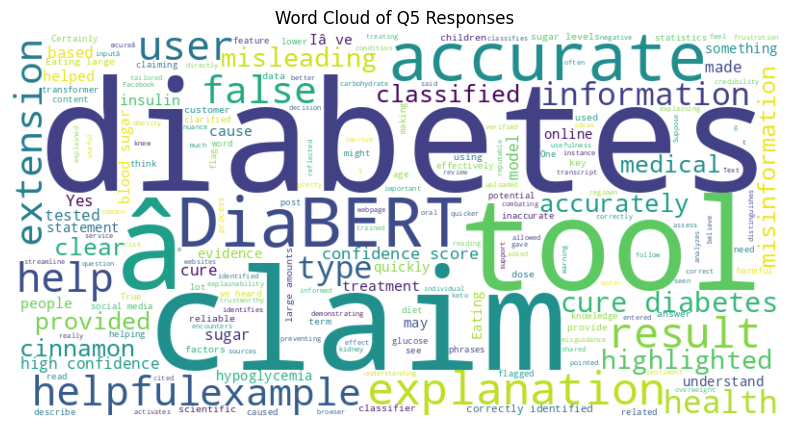

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# STEP 1: Load the file (adjust filename as needed)
df = pd.read_csv("/content/drive/MyDrive/DiaBERT response.csv")

# STEP 2: Extract and clean Q5 responses
q5_raw = df['Q5'].dropna().astype(str)

# STEP 3: Remove placeholders and too-short responses
placeholders = ['n/a', 'na', 'none', '.', 'yes', 'no', 'nil', 'nill', '...', 'good', 'ok']
q5_cleaned = q5_raw[~q5_raw.str.lower().isin(placeholders)]
q5_cleaned = q5_cleaned[q5_cleaned.str.len() > 10]

# STEP 4: Define a basic theme detection function using keyword matching
def identify_theme(response):
    r = response.lower()
    if "cinnamon" in r or "sugar" in r or "overweight" in r or "diabetes cause" in r:
        return "Correction of Misconceptions"
    elif "confidence" in r or "score" in r or "explanation" in r or "highlight" in r:
        return "Appreciation of Explanation"
    elif "true" in r or "accurate" in r or "classification" in r:
        return "Validation of Accurate Information"
    elif "kidney" in r or "hydration" in r or "nuanced" in r:
        return "Clarification of Complex Claims"
    else:
        return "Other/General Helpfulness"

# STEP 5: Apply theme tagging
themes = q5_cleaned.apply(identify_theme)

# STEP 6: Combine into a DataFrame
q5_themes_df = pd.DataFrame({
    'Response': q5_cleaned.values,
    'Theme': themes.values
})

# STEP 7: Count frequencies of each theme
theme_counts = q5_themes_df['Theme'].value_counts().reset_index()
theme_counts.columns = ['Theme', 'Frequency']

# Display theme table
print(theme_counts)

# STEP 8: Generate a Word Cloud
text = " ".join(q5_cleaned.tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Q5 Responses")
plt.show()


                        Theme  Frequency
0  Other/General Disagreement          2


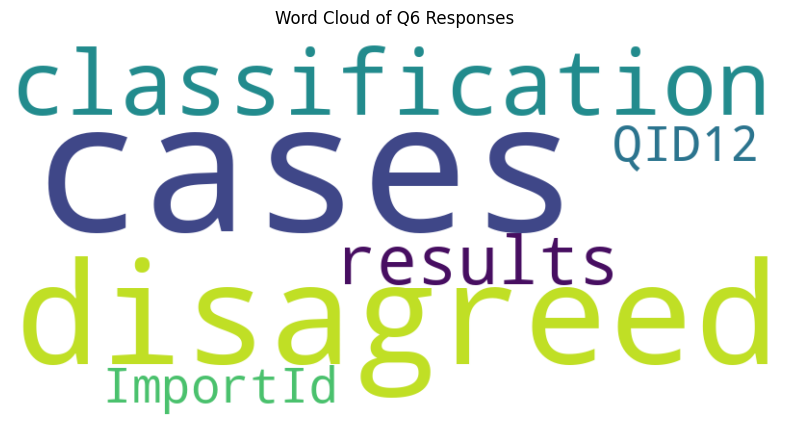

In [ ]:
# STEP 1: Extract and clean Q6 responses
q6_raw = df['Q6'].dropna().astype(str)

# STEP 2: Remove placeholders and short/irrelevant entries
placeholders = ['n/a', 'na', 'none', '.', 'yes', 'no', 'nil', 'nill', '...', 'good', 'ok']
q6_cleaned = q6_raw[~q6_raw.str.lower().isin(placeholders)]
q6_cleaned = q6_cleaned[q6_cleaned.str.len() > 10]

# STEP 3: Define themes for Q6
def identify_q6_theme(response):
    r = response.lower()
    if "should have been true" in r or "wrongly classified" in r or "not misleading" in r:
        return "Incorrectly Flagged as Misinformation"
    elif "should have been false" in r or "missed harmful info" in r or "not flagged" in r:
        return "Missed False or Harmful Claim"
    elif "confidence" in r or "not sure" in r or "low score" in r:
        return "Low Confidence or Uncertainty"
    else:
        return "Other/General Disagreement"

# STEP 4: Apply the theme function
q6_themes = q6_cleaned.apply(identify_q6_theme)

# STEP 5: Build themed DataFrame
q6_themes_df = pd.DataFrame({
    'Response': q6_cleaned.values,
    'Theme': q6_themes.values
})

# STEP 6: Count theme frequencies
q6_theme_counts = q6_themes_df['Theme'].value_counts().reset_index()
q6_theme_counts.columns = ['Theme', 'Frequency']

# Display theme summary
print(q6_theme_counts)

# STEP 7: Word Cloud (optional)
text_q6 = " ".join(q6_cleaned.tolist())

wordcloud_q6 = WordCloud(width=800, height=400, background_color='white').generate(text_q6)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_q6, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Q6 Responses")
plt.show()


                                    Theme  Frequency
0     Confidence Score or Model Certainty         14
1            Transparency and Explanation         13
2                  General Trust Feedback         12
3  Alignment with Known Medical Knowledge          2
4                       Understandability          1


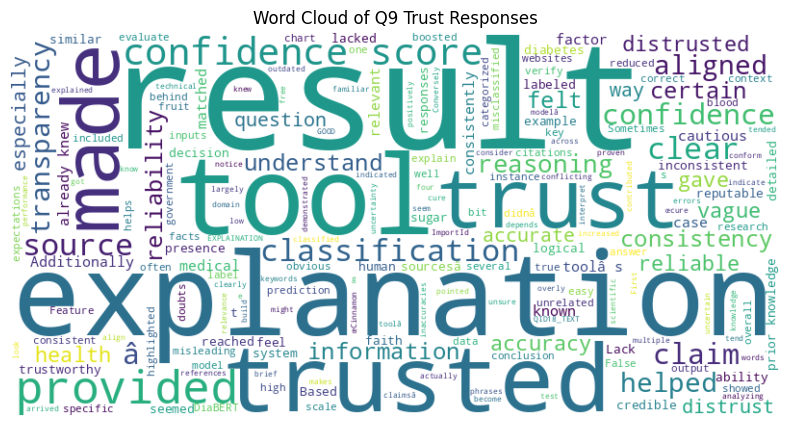

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract and clean Q9 (Trust/Distrust Justification)
q9_raw = df['Q9'].dropna().astype(str)
placeholders = ['n/a', 'na', 'none', '.', 'yes', 'no', 'nil', 'nill', '...', 'good', 'ok']
q9_cleaned = q9_raw[~q9_raw.str.lower().isin(placeholders)]
q9_cleaned = q9_cleaned[q9_cleaned.str.len() > 10]

# Define function to identify trust themes
def trust_theme(response):
    r = response.lower()
    if "confidence" in r or "score" in r:
        return "Confidence Score or Model Certainty"
    elif "explanation" in r or "explain" in r or "clear" in r:
        return "Transparency and Explanation"
    elif "highlight" in r or "keywords" in r or "understand" in r:
        return "Understandability"
    elif "matched" in r or "agree" in r or "medical" in r or "aligned" in r:
        return "Alignment with Known Medical Knowledge"
    elif "vague" in r or "confusing" in r or "missing" in r:
        return "Distrust Due to Ambiguity"
    else:
        return "General Trust Feedback"

# Apply theme tagging
trust_themes = q9_cleaned.apply(trust_theme)

# Combine into a DataFrame
q9_theme_df = pd.DataFrame({
    'Response': q9_cleaned.values,
    'Theme': trust_themes.values
})

# Count theme frequencies
trust_theme_counts = q9_theme_df['Theme'].value_counts().reset_index()
trust_theme_counts.columns = ['Theme', 'Frequency']

# Display output
print(trust_theme_counts)

# Generate optional word cloud
text_q9 = " ".join(q9_cleaned.tolist())
wordcloud_q9 = WordCloud(width=800, height=400, background_color='white').generate(text_q9)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_q9, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Q9 Trust Responses")
plt.show()


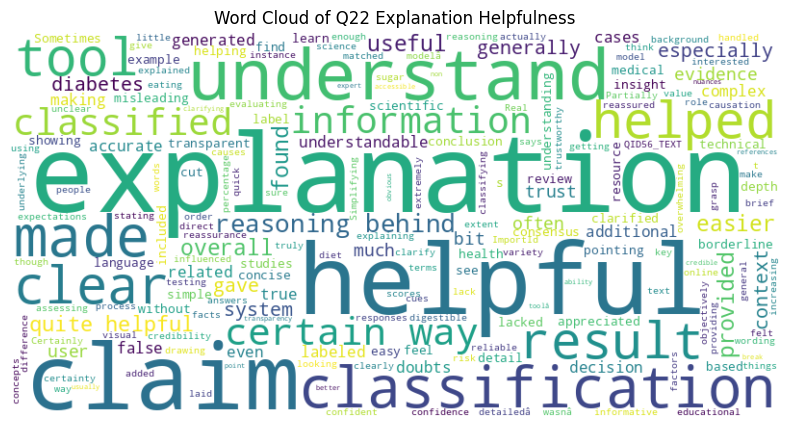

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


q22_raw = df['Q22'].dropna().astype(str)
placeholders = ['n/a', 'na', 'none', '.', 'yes', 'no', 'nil', 'nill', '...', 'good', 'ok']
q22_cleaned = q22_raw[~q22_raw.str.lower().isin(placeholders)]
q22_cleaned = q22_cleaned[q22_cleaned.str.len() > 10]


def explanation_theme(response):
    r = response.lower()
    if "very helpful" in r or "extremely helpful" in r or "clear" in r or "insightful" in r:
        return "Highly Helpful"
    elif "somewhat helpful" in r or "to an extent" in r or "helpful but" in r or "kind of" in r:
        return "Moderately Helpful"
    elif "not helpful" in r or "confusing" in r or "vague" in r or "unclear" in r:
        return "Unhelpful or Lacking"
    else:
        return "General Positive"


q22_themes = q22_cleaned.apply(explanation_theme)


q22_df = pd.DataFrame({
    'Response': q22_cleaned.values,
    'Theme': q22_themes.values
})

q22_theme_counts = q22_df['Theme'].value_counts().reset_index()
q22_theme_counts.columns = ['Theme', 'Frequency']

text_q22 = " ".join(q22_cleaned.tolist())
wordcloud_q22 = WordCloud(width=800, height=400, background_color='white').generate(text_q22)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_q22, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Q22 Explanation Helpfulness")
plt.show()


Q23 Summary:
   Response  Count
0      Yes     41
1       No      4

Q24 Theme Summary:
                                 Theme  Frequency
0  General Trust or Distrust Feedback         23
1              Clarity of Explanation         10
2  Trust Boosted by Confidence Scores          7


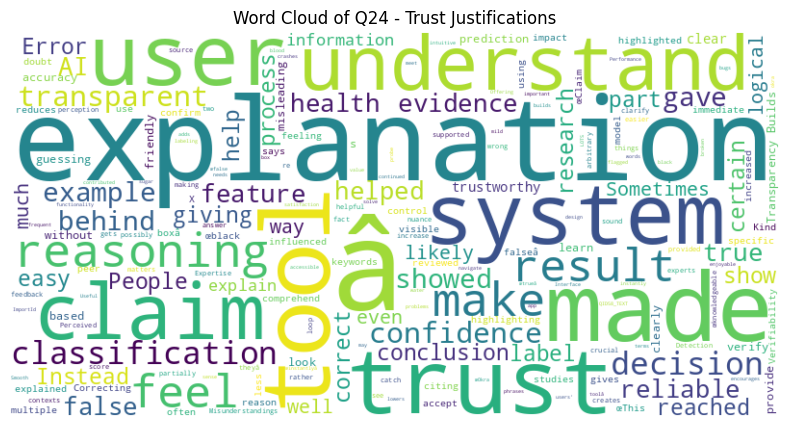

In [ ]:


# STEP 1: Process Q23 (Yes/No)
q23_numeric = pd.to_numeric(df['Q23'], errors='coerce')
q23_labels = {1: 'Yes', 2: 'No'}
q23_labeled = q23_numeric.replace(q23_labels)
q23_summary = q23_labeled.value_counts().reset_index()
q23_summary.columns = ['Response', 'Count']
print("Q23 Summary:\n", q23_summary)

# STEP 2: Clean Q24 (why explanation influenced or not)
q24_raw = df['Q24'].dropna().astype(str)
placeholders = ['n/a', 'na', 'none', '.', 'yes', 'no', 'nil', 'nill', '...', 'good', 'ok']
q24_cleaned = q24_raw[~q24_raw.str.lower().isin(placeholders)]
q24_cleaned = q24_cleaned[q24_cleaned.str.len() > 10]

# STEP 3: Theme tagging for Q24
def explanation_trust_theme(response):
    r = response.lower()
    if "confidence" in r or "score" in r:
        return "Trust Boosted by Confidence Scores"
    elif "clear" in r or "understand" in r or "explained" in r:
        return "Clarity of Explanation"
    elif "highlight" in r or "keywords" in r:
        return "Visual Explanation Support"
    elif "vague" in r or "not helpful" in r or "unclear" in r:
        return "Distrust Due to Lack of Clarity"
    else:
        return "General Trust or Distrust Feedback"

q24_themes = q24_cleaned.apply(explanation_trust_theme)

# STEP 4: Build DataFrame and count themes
q24_df = pd.DataFrame({
    'Response': q24_cleaned.values,
    'Theme': q24_themes.values
})
q24_theme_counts = q24_df['Theme'].value_counts().reset_index()
q24_theme_counts.columns = ['Theme', 'Frequency']
print("\nQ24 Theme Summary:\n", q24_theme_counts)

# STEP 5: Word Cloud (Optional)
text_q24 = " ".join(q24_cleaned.tolist())
wordcloud_q24 = WordCloud(width=800, height=400, background_color='white').generate(text_q24)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_q24, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Q24 - Trust Justifications")
plt.show()
